# <font color= "Brown">La Esencia del Cliente</font>

La junta directiva de la cadena de supermercados Universal Food ha observado una estabilización en sus ventas y busca comprender cómo mejorar la relación con sus clientes, entendiendo sus hábitos de compra, para ofrecerles un servicio de mayor calidad. El objetivo es proporcionarles una experiencia de compra más personalizada, rápida y efectiva.

In [1]:
# Librerias Necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import warnings


## 2.- Obtención de datos

Los datos para este análisis se obtuvieron del siguiente repositorio: <br>
"Cost Prediction on acquiring Customers." <br> https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

### 2.1 -Carga de datos

In [2]:
# Cargar datos:

# Dirección de notebook actual
script = os.getcwd()
# Dirección del archivo necesario, partiendo de la ubicación actual.
file = os.path.join(script,"data", "media_prediction_and_its_cost.csv")
# Lectura de archivo .csv
df = pd.read_csv(file)
# Impresión de 5 registros del DataFrame
df.sample(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
28626,Electrical,Household,Non-Consumable,8.68,2.8644,4.0,Price Savers,USA,S,F,...,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,In-Store Coupon,81.85
1006,Canned Shrimp,Canned Foods,Food,9.33,4.5717,3.0,I Cant Believe It Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Product Attachment,69.47
13066,Meat,Meat,Food,5.70,2.5650,3.0,Pick Your Savings,USA,S,M,...,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Radio,147.17
45804,Vegetables,Canned Foods,Food,5.22,2.3490,3.0,Two for One,Mexico,M,F,...,30351.0,4819.0,3213.0,0.0,0.0,0.0,0.0,0.0,Cash Register Handout,123.63
59861,Magazines,Periodicals,Non-Consumable,11.12,5.1152,4.0,High Roller Savings,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16


### 2.2-Limpieza de datos

Como nuestros datos se encuentran en inglés, procederemos a traducirlos al Español. <br>
- Dentro de la carpeta *data* de este repositorio, se encuentra el archivo *diccionarios.py* que contiene todos los diccionarios utilizados para traducir este DataFrame a Español.


In [3]:
# Cargamos el archivo con todos los diccionarios necesarios para la traducción
from data.diccionarios import *

# Ajustamos el número de columnas mostradas para observar el set completo
pd.set_option("display.max_columns", 40)

El archivo contiene un total de 15 diccionarios:

- "columnas" --- Contiene el nombre de la cada columna y su traducción.

El resto de los diccionarios corresponde a cada columna a traducir, contienen el nombre de cada elemento único en la columna y su respectiva traducción.
- "categoria_alimento"
- "departamento"
- "tipo"
- "promocion"
- "escolaridad"
- "miembro"
- "ocupacion"
- "pais"
- "estado_civil"
- "genero"
- "vivienda_propia"
- "ingreso_anual"
- "comercio"
- "divulgacion"

Antes de realizar la traducción se mostrarán algunos registros para observar su estructura antes de ser tratados.

In [4]:
df.sample(3)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
59450,Magazines,Periodicals,Non-Consumable,4.92,1.6236,3.0,Saving Days,Mexico,S,F,1.0,High School Degree,Bronze,Skilled Manual,Y,2.0,$30K - $50K,0.0,2.0,Mighty Good,1.64,18.30,17.20,1.0,0.0,6.0,Gourmet Supermarket,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,"Daily Paper, Radio, TV",90.65
22697,Beer and Wine,Alcoholic Beverages,Drink,6.87,2.3358,3.0,Price Savers,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Walrus,2.29,9.38,8.38,1.0,0.0,9.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Sunday Paper, Radio",80.29
44178,Vegetables,Frozen Foods,Food,2.70,1.1070,2.0,Shelf Emptiers,Mexico,M,F,1.0,Partial High School,Normal,Manual,Y,1.0,$10K - $30K,0.0,1.0,Big Time,1.35,12.00,9.00,0.0,0.0,5.0,Gourmet Supermarket,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,"Daily Paper, Radio",147.82


#### 2.2.1 Traducción de nombres de columnas.

In [5]:
# Para esta operación se utilizará el diccionario "columnas" que existe dentro
# del archivo "diccionarios.py"

df.rename(columns=columnas, inplace=True)

#Imprimimos los resultados obtenidos, observando los nuevos nombres de cada columna
df.sample(2)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos_2_(aprox),marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
41498,Side Dishes,Deli,Food,4.46,2.1854,2.0,Shelf Clearing Days,USA,M,M,1.0,Partial High School,Normal,Skilled Manual,N,1.0,$10K - $30K,0.0,1.0,Moms,2.23,16.9,13.8,1.0,1.0,15.0,Supermarket,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio",76.41
26721,Fruit,Produce,Food,5.40,2.2680,4.0,Save-It Sale,Canada,S,F,1.0,Partial High School,Normal,Manual,N,0.0,$10K - $30K,0.0,0.0,Ebony,1.35,21.5,19.5,1.0,0.0,34.0,Deluxe Supermarket,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,75.22


#### 2.2.2 Traducción de columnas.

In [6]:
# Nota: cada metodo ".replace" funciona con un diccionario del archivo "diccionario.py"

df["categoria_alimento"] = df["categoria_alimento"].replace(categoria_alimento)
df["departamento"] = df["departamento"].replace(departamento)
df["tipo"] = df["tipo"].replace(tipo)
df["promocion"] = df["promocion"].replace(promocion)
df["escolaridad"] = df["escolaridad"].replace(escolaridad)
df["miembro"] = df["miembro"].replace(miembro)
df["ocupacion"] =df["ocupacion"].replace(ocupacion)
df["pais"] = df["pais"].replace(pais)
df["estado_civil"] = df["estado_civil"].replace(estado_civil)
df["genero"] = df["genero"].replace(genero)
df["vivienda_propia"] = df["vivienda_propia"].replace(vivienda_propia)
df["ingreso_anual"] =df["ingreso_anual"].replace(ingreso_anual)
df["comercio"] = df["comercio"].replace(comercio)
df["divulgacion"] = df["divulgacion"].replace(divulgacion)
df["numero_hijos"] = df["numero_hijos"].astype(int)
df["empaque_reciclable"] = df["empaque_reciclable"].astype(int)
df = df.drop(columns="promedio_autos_2_(aprox)")
df["total_de_hijos"] = df["total_de_hijos"].astype(int)
df["promedio_autos(aprox)"] = df["promedio_autos(aprox)"].astype(int) 
# Mostramos los resultados de nuestra traducción.
df.sample(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
59654,Productos de baño,Artículos para el hogar,No comestible,5.56,2.5576,4.0,Días de luz verde,México,Casado,Femenino,3,Secundaria,Bronce,Profesional,No,1,80000,1,High Quality,1.39,21.70,18.70,1,0.0,11.0,Supermercado gourmet,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,Periódico diario,75.76
54757,Productos de plástico,Artículos para el hogar,No comestible,13.84,6.7816,4.0,Aplastadores de precios,Canadá,Casado,Masculino,1,Primaria,Plata,Profesional,No,1,120000,1,Red Wing,3.46,16.50,15.50,1,0.0,17.0,Supermercado de lujo,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Panfletos,95.45
46222,Platos preparados congelados,Alimentos congelados,Comida,5.49,1.8666,3.0,Tres por uno,Estados Unidos,Soltero,Masculino,1,Secundaria,Normal,Técnico,No,1,40000,0,Golden,1.83,9.43,6.43,0,0.0,33.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Anexo del producto,122.47


## 3.- Exploración de los datos

La exploración visual de datos permite examinar y explorar los datos de manera intuitiva y eficiente. Al representar los datos visualmente, se pueden identificar características importantes, como valores atípicos, distribuciones, correlaciones y agrupaciones, que podrían no ser evidentes al examinar solo los números o las tablas de datos.

### 3.1- Exploración de datos 

In [7]:
# Una breve introducción al dataframe, son sus datos estructurales.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  int32  
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

Cómo podemos observar el dataframe esta compuesto de 38 columnas o variables, con un total de 60,428 registros repartidos en 20 variables del tipo Float, 3 del tipo Int y 16 del tipo Object (String). <br>

A continuación se muestra un resumen descriptivo del Dataframe:

In [8]:
df.describe().T.style.bar(subset=['mean'], color="#4EC9CA")\
                .background_gradient(subset=["std"], cmap="mako_r")\
                .background_gradient(subset=["50%"], cmap="mako_r")

,count,mean,std,min,25%,50%,75%,max
ventas_tienda(en millones),60428.000000,6.541031,3.463047,0.510000,3.810000,5.940000,8.670000,22.920000
costo_tienda(en millones),60428.000000,2.619460,1.453009,0.163200,1.500000,2.385600,3.484025,9.726500
ventas_unitarias(en millones),60428.000000,3.093169,0.827677,1.000000,3.000000,3.000000,4.000000,6.000000
total_de_hijos,60428.000000,2.533875,1.490165,0.000000,1.000000,3.000000,4.000000,5.000000
promedio_autos(aprox),60428.000000,2.200271,1.109644,0.000000,1.000000,2.000000,3.000000,4.000000
ingreso_anual,60428.000000,58312.371748,36093.954105,20000.000000,40000.000000,40000.000000,80000.000000,160000.000000
numero_hijos,60428.000000,0.829351,1.303424,0.000000,0.000000,0.000000,1.000000,5.000000
precio_recomendado,60428.000000,2.115258,0.932829,0.500000,1.410000,2.130000,2.790000,3.980000
peso_bruto,60428.000000,13.806433,4.622693,6.000000,9.700000,13.600000,17.700000,21.900000
peso_neto,60428.000000,11.796289,4.682986,3.050000,7.710000,11.600000,16.000000,20.800000


En el resumen de descripción anterior se muestran algunas medidas descriptivas, para mostrar un bosquejo del contexto de nuestros datos de manera estadística, como aquellas variables que están muy fuera de los rangos de valores manejados por los datos, cómo se puede observar, las columnas de **Ingreso_anual y Pies_cuadrados_tienda**, por tener registros con valores muchos más altos en promedio, de igual manera tanto para los valores de desviación estándar, como para la mediana (El 50% de los datos).

### 3.2- Exploración visual

La exploración visual de datos nos permite examinar y explorar los volúmenes de datos de manera intuitiva y eficiente. Al representar los datos visualmente, se pueden identificar características importantes, como valores atípicos, distribuciones, correlaciones y agrupaciones, que podrían no ser evidentes al examinar solo los números o las tablas de datos.

In [9]:
# Muestra de nuestros datos a explorar
df.head(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1,Primaria,Normal,Técnico,Sí,1,20000,1,Carrington,1.84,19.7,17.7,1,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0,Superior,Plata,Profesional,Sí,4,60000,0,Carrington,1.84,19.7,17.7,1,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4,Primaria,Normal,Obrero,No,1,20000,0,Carrington,1.84,19.7,17.7,1,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16


#### 3.2.1- Correlación de variables<br>

En esta sección se explorarán las variables,  sus distrubiciones y sus correlaciones con otras.

**Ingreso anual promedio por escolaridad y ocupación**

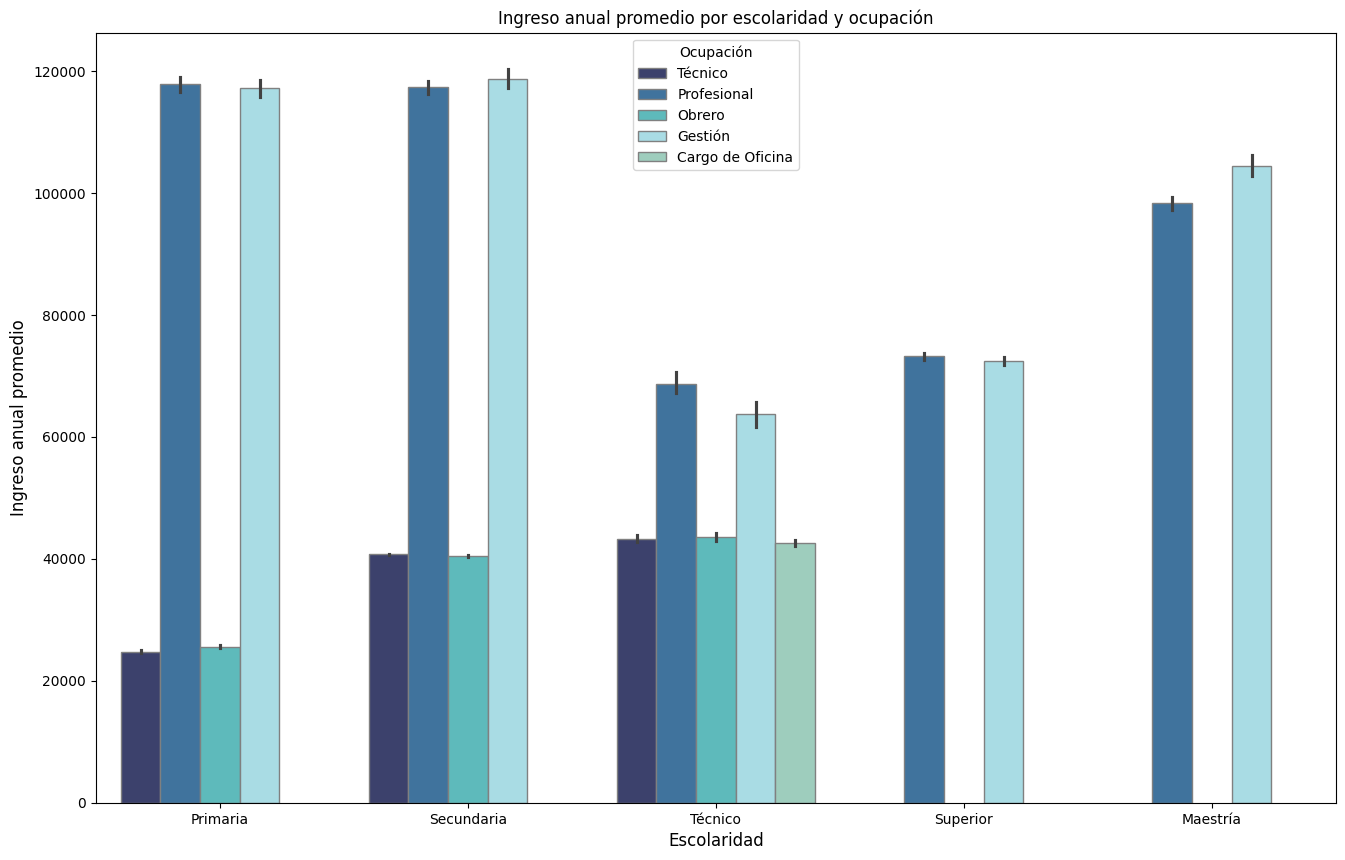

In [10]:
# Lienzo del gráfico
plt.figure(figsize=(16,10))
palette = ["#343A74", "#3075AC", "#4EC9CA","#9FE3EE","#96D5BF"]

# Orden para el eje x
orden = ["Primaria", "Secundaria", "Técnico", "Superior", "Maestría"]

# Creación del gráfico y parámetros
sns.barplot(x="escolaridad", y="ingreso_anual", data=df,order=orden, hue="ocupacion", palette=palette, edgecolor="gray")
plt.ylabel("Ingreso anual promedio", fontsize=12)
plt.xlabel("Escolaridad", fontsize=12)
plt.legend(title="Ocupación")
plt.title("Ingreso anual promedio por escolaridad y ocupación")
plt.show()

En este gráfico podemos observar que los sueldos tienen a ir aumentando conforme aumenta el nivel de escolaridad. Ademas, en promedio los mayores sueldos son para aquellos clientes que cuentan con un grado "Superior" o "Maestría" y que ademas ocupan puestos de "Gestión" y "Profesionales".

**Tipo y número de miembros por ciudad**

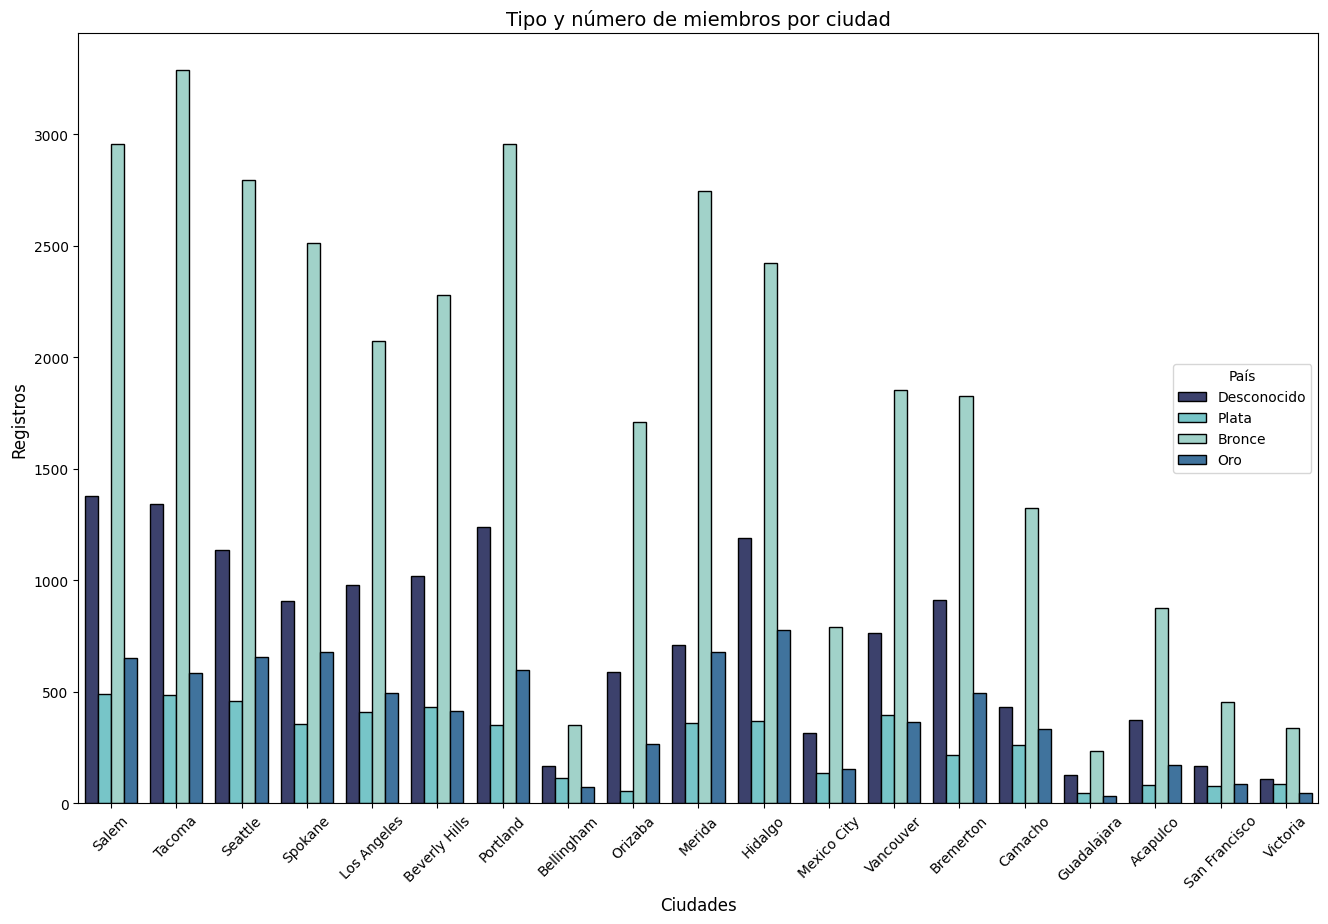

In [11]:
# Lienzo del gráfico
fig, ax = plt.subplots(figsize=(16,10))

palette = sns.blend_palette(["#343A74","#4EC9CA","#9FE3EE","#96D5BF","#3075AC"], as_cmap=False, n_colors=4)
# Creación de gráficos y parámetros
sns.countplot(data=df.dropna(), x="ciudad", hue="miembro",palette=palette, edgecolor="black")

plt.ylabel("Registros", fontsize=12)
plt.xlabel("Ciudades", fontsize=12)
plt.legend(title="País", loc="center right", labels =["Desconocido", "Plata", "Bronce", "Oro"])
plt.xticks(rotation=45)
plt.title("Tipo y número de miembros por ciudad", fontsize=14)
plt.show()

En este gráfico pordemos observar, que el país con el promedio más alto de miembros es *Estados Unidos*, contando con las 4 primeras ciudades con mayor número, seguido por *México* y por último *Canáda*. La ciudad con el mayor número de miembros es **Tacoma** en *Estados Unidos*, mientras que la ciudad con los menores registros es **Guadalajara** en *México*.

**Categoría de productos más registradas por tipo de empaque**

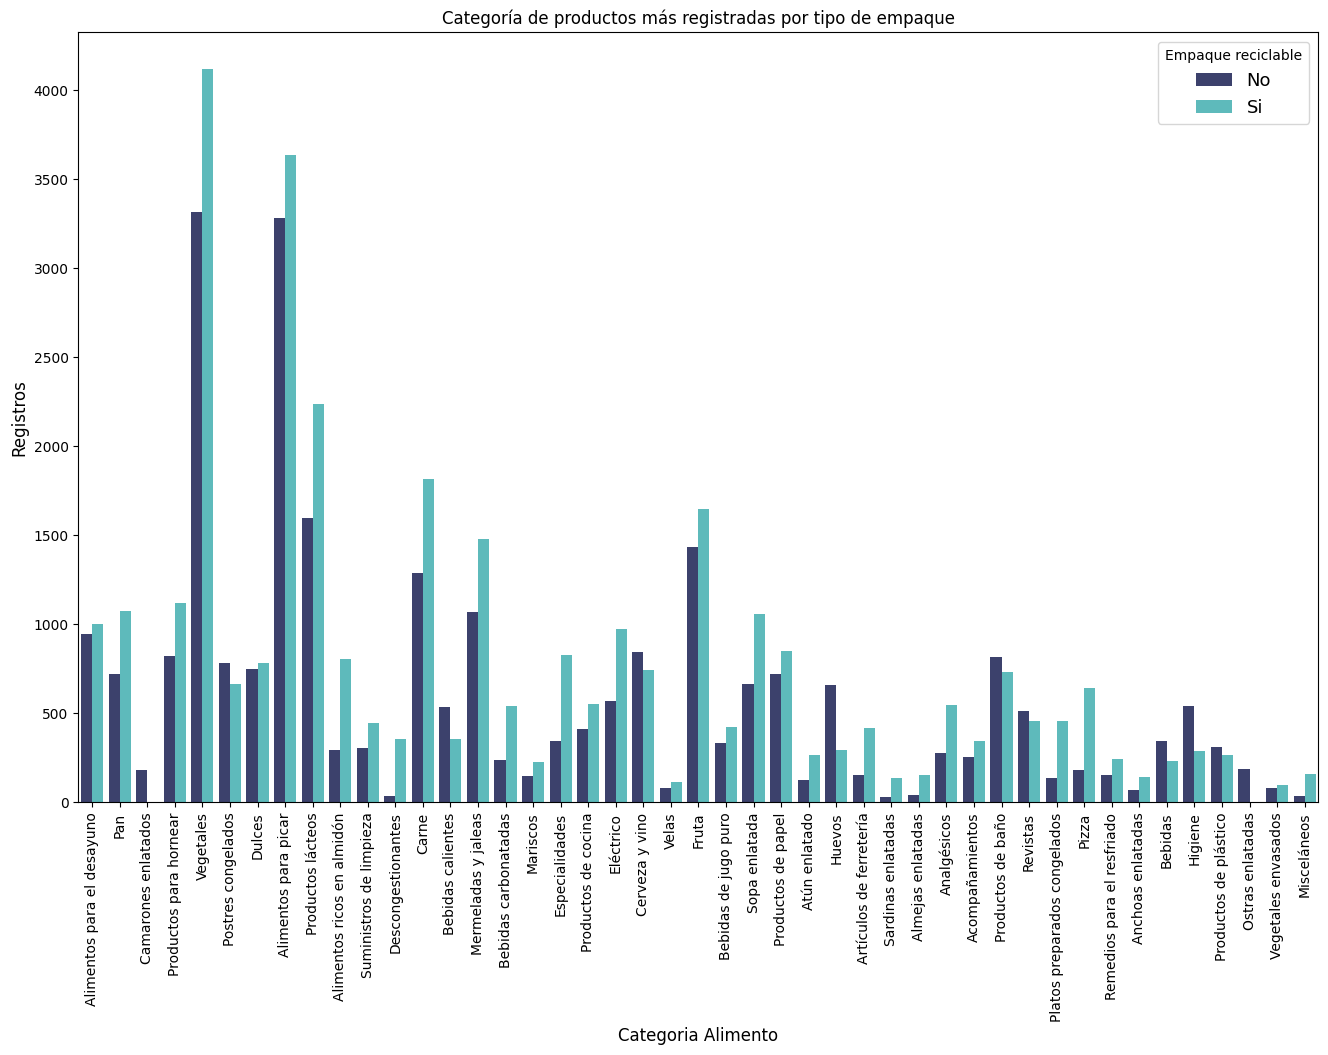

In [12]:
# Lienzo del gráfico
plt.figure(figsize=(16,10))
palette = sns.blend_palette(["#343A74","#4EC9CA"], as_cmap=False, n_colors=2)

# Creación del gráfico y parámetros
sns.countplot(x="categoria_alimento", data=df, hue="empaque_reciclable", palette=palette)
plt.xticks(rotation=90)
plt.xlabel("Categoria Alimento", fontsize=12)
plt.ylabel("Registros", fontsize=12)
plt.title("Categoría de productos más registradas por tipo de empaque")
# Correción de leyenda
plt.legend(title="Empaque reciclable", fontsize=13, labels =["No", "Si"])
plt.show()

Cómo podemos observar en la gráfica anterior, existen 6 categorias que destacan sobre todas las demas: <br>
**Vegetales, Alimentos para picar, Productos lácteos, Carne, Frutas y 'Mermeladas y Jaleas'.**

**Ingresos anuales y número de hijos vs Costos de adquisición de clientes**

<Figure size 1600x1000 with 0 Axes>

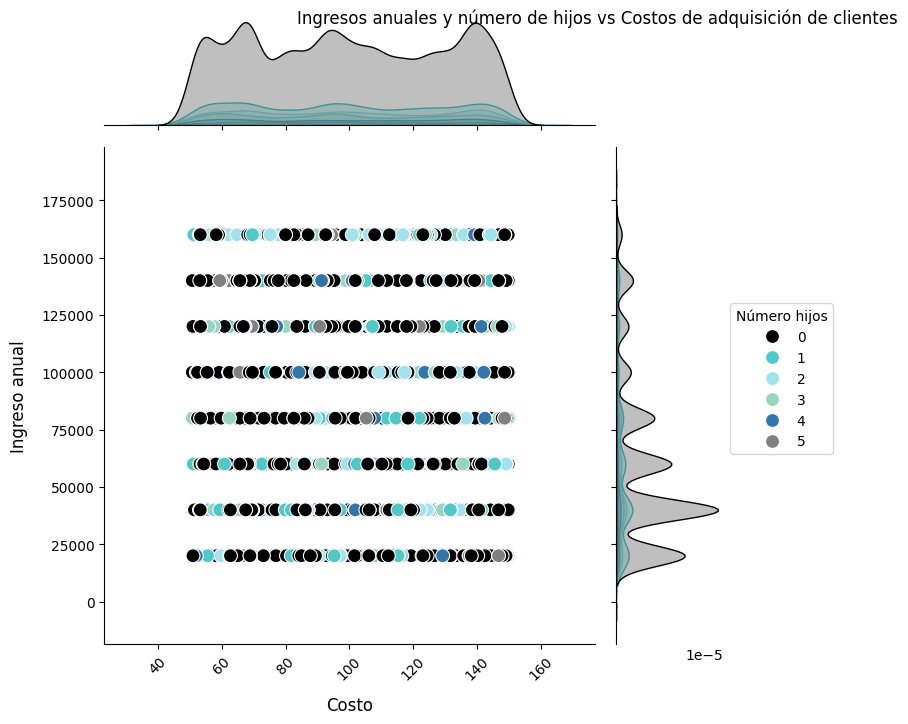

In [13]:
plt.figure(figsize=(16,10))
palette = sns.blend_palette(["Black","#4EC9CA","#9FE3EE","#96D5BF","#3075AC","Gray"], as_cmap=False, n_colors=6)
#Creación del gráfico y parámetros
grafico = sns.jointplot(data=df, x="costo",y="ingreso_anual",
            ratio=4, height=7, palette=palette,
            marker = "o",s=100,hue="numero_hijos")
grafico.fig.suptitle("Ingresos anuales y número de hijos vs Costos de adquisición de clientes").set_position([0.8,0.99])
grafico.ax_joint.set_xlabel("Costo", labelpad=10, fontsize=12)
grafico.ax_joint.set_ylabel("Ingreso anual", labelpad=10, fontsize=12)
plt.legend(title="Número hijos",bbox_to_anchor=(1.5,0.7))
plt.xticks(rotation=45)
plt.show()


En este gráfico podemos observar que los clientes que mayor costo de adquisición representan para la empresa son aquellos con un sueldo entre los 10k y 75k con el pico entre 25k y 50k, y sobre todo en aquellos clientes que contestaron no tener hijos.

#### 3.2.2- Dsitribución de variables individuales<br>

El observar cómo se dsitribuyen los datos de algunas variables que se consideran importante puede dar luz, sobre patrones dentro de DataFrame

In [14]:
# En esta sección se procederá a realizar una función para graficar la tendencia
# de una variable, tomando en cuenta sí comparte el lienzo grafico o no.

def distribucion_categorica(dataframe,columna, ax = None):
    """Esta función está hecha para observar la distribución de las variables
        basado en el número de graficos que la acompañarán
    """

    # En esta sección tomamos sólo los datos necesarios y ajustamos su formato.
    data = dataframe.groupby(columna)[["costo"]].count()
    data.rename(columns={"costo":"recuento"}, inplace=True)

    # Para continuar con los colores elegidos para este desafió, crearemos la paleta de colores.
    colors = sns.blend_palette(["#4EC9CA","#343A74","#9FE3EE","#96D5BF","#3075AC"], as_cmap=False, n_colors=len(data))

    if ax is None:
        # Lienzo del gráfico.
        plt.figure(figsize=(8,8))
        # Grafica
        graph = sns.barplot(data=data, x=data.index, y="recuento", hue=columna, palette=colors)

        # Valores de cada barra
        for bar in graph.patches:
            height = bar.get_height()
            graph.text(bar.get_x() + bar.get_width()/1.7, height +len(dataframe)*0.001,
                        f"{round(height/len(dataframe)*100,2)}%",ha = "center",
                        va = "bottom", fontsize = 8, rotation=90)
            
        # Elementos del gráfico    
        max = data["recuento"].max()*1.2
        plt.xticks(rotation=90)
        plt.ylim(0,max)
        plt.ylabel("Recuento", fontsize = 12)
        plt.xlabel("")
        plt.title(columna.replace("_", " ").capitalize(), fontsize=12)
        plt.show()
    else:
        graph = sns.barplot(data=data, x="recuento", y=data.index, hue=columna,
                    palette=colors, ax=ax)
                # Valores de cada barra
            
        # Elementos del gráfico    
        max = data["recuento"].max()*1.1
        ax.set_xlim(0,max)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_title(f'Recuento de {columna.replace("_", " ").capitalize()}', fontsize=12, weight="bold")
    

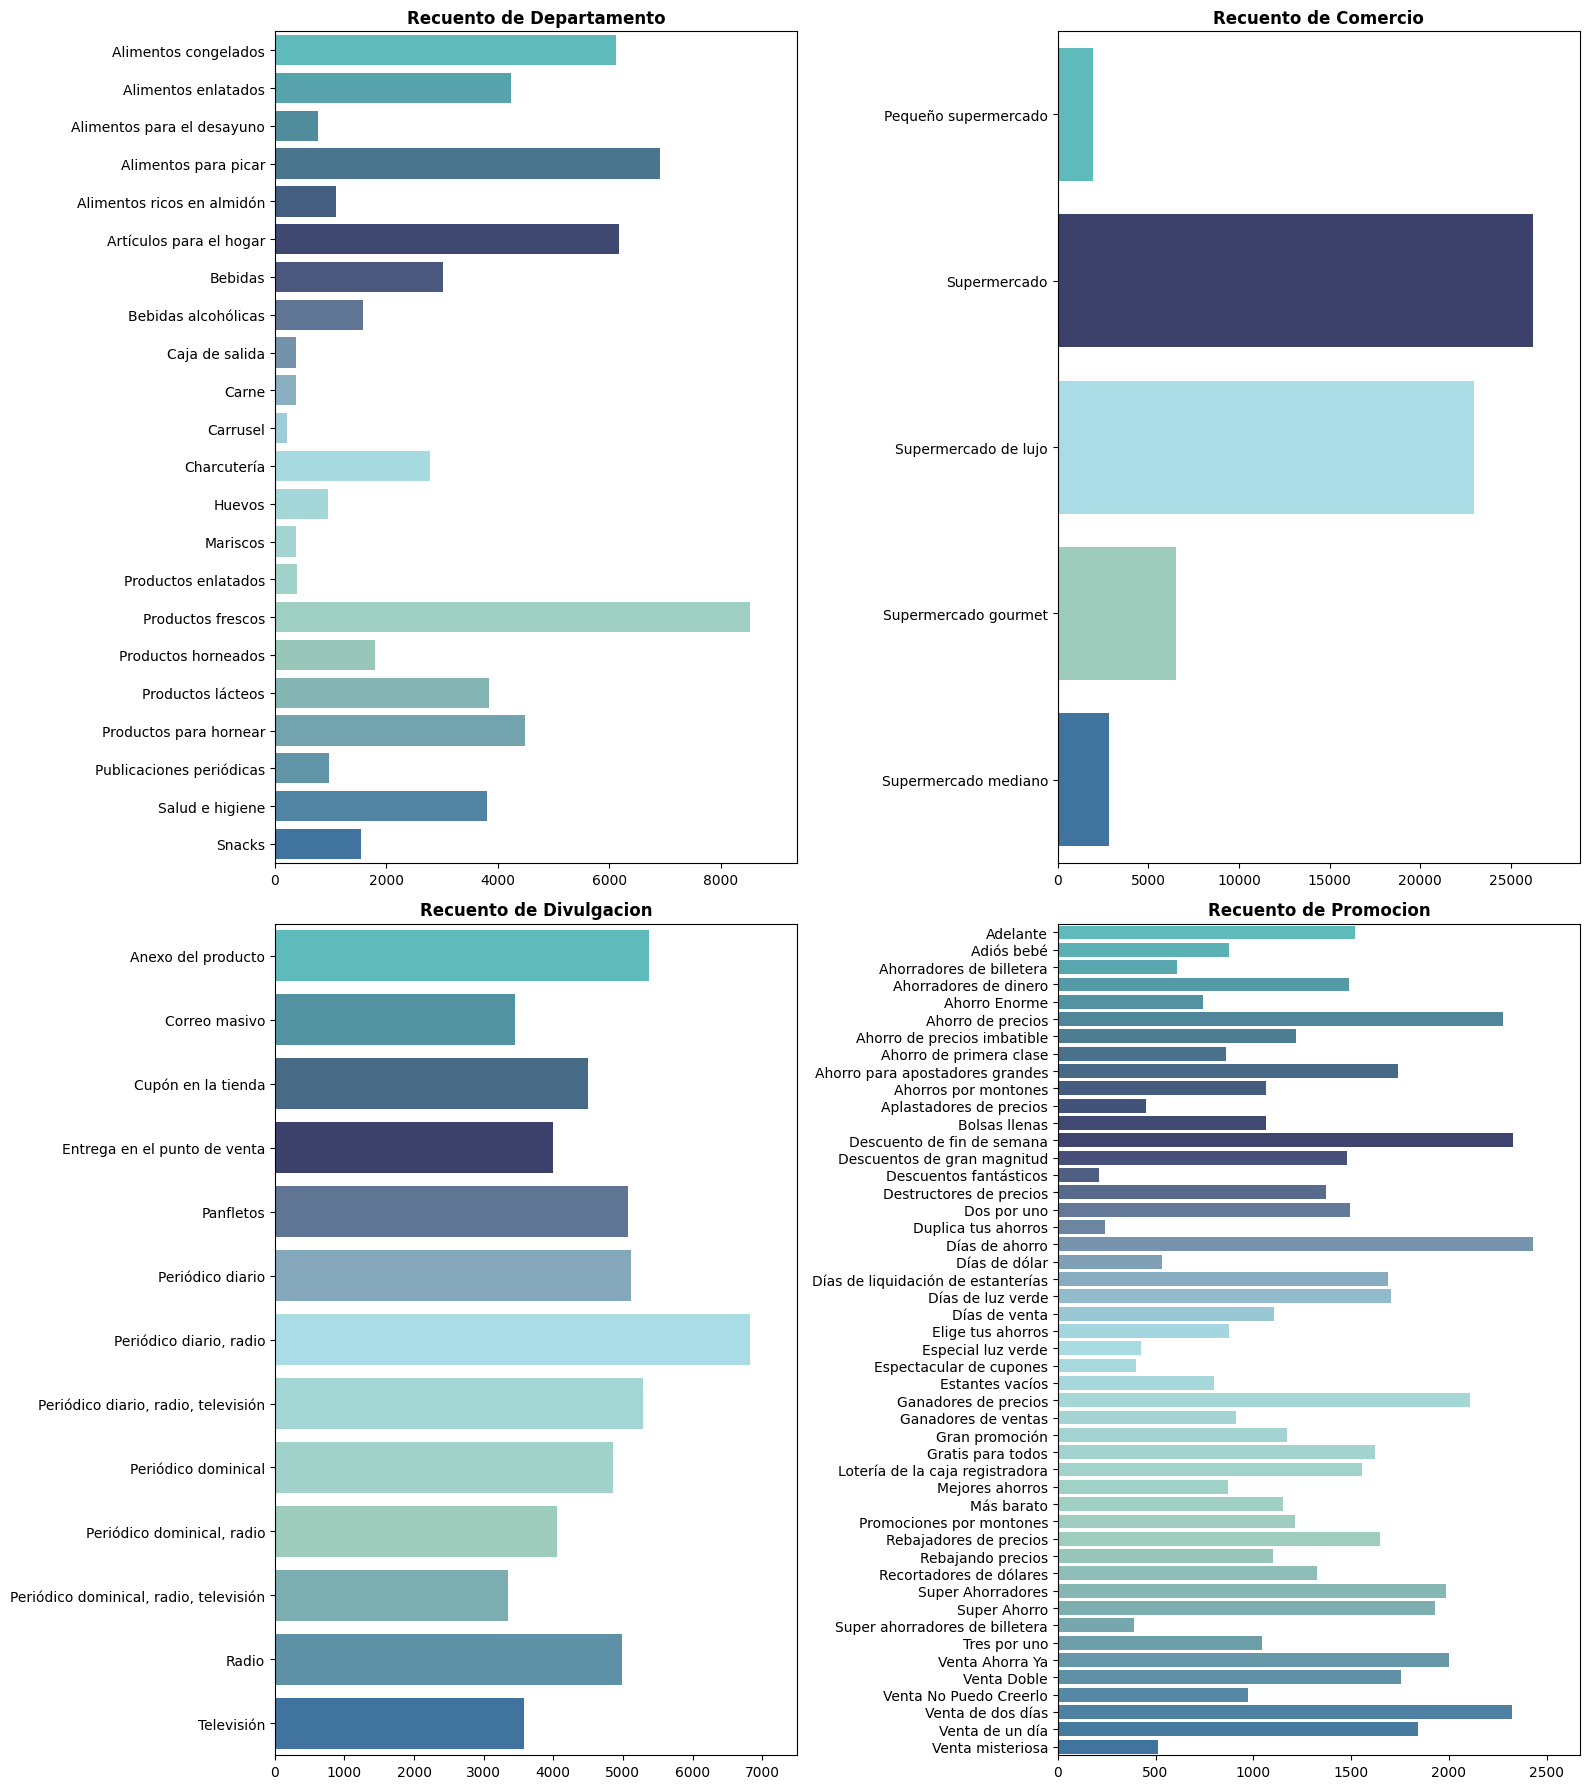

In [15]:
# Gráfico combinado
area = plt.figure(figsize=(16,18))
G1 = area.add_subplot(2,2,1)
G2 = area.add_subplot(2,2,2)
G3 = area.add_subplot(2,2,3)
G4 = area.add_subplot(2,2,4)

#Grafico para cada región
distribucion_categorica(dataframe=df, columna="departamento", ax=G1)
distribucion_categorica(dataframe=df, columna="comercio", ax=G2)
distribucion_categorica(dataframe=df, columna="divulgacion", ax=G3)
distribucion_categorica(dataframe=df, columna="promocion", ax=G4)

plt.tight_layout()
plt.show();

En la representación grafica podemos observar lo siguiente: <br>

Los departamentos que concentran la mayor cantidad de registros son: ***Productos frescos, Artículos para el hogar, Alimentos para picar y Congelados**. <br>

Los registros en su mayoría provienen de 2 tipos de comercios: **Supermercados y Mercados de Lujo**. <br>

La mayor divulgación de los productos se da por medio de **Periodícos y Radio**. <br>

Y por otro lado las promociones que mejor recuento tienen son: **Días de ahorro, Descuentos de fin de semana, Venta de dos días y Ahorro de precios**.

In [16]:
# Esta sección se enfoca en graficar aquellas categorias con menos valores
# por lo cual su distribución es mucho más sencilla de visualizar en graficos de pastel.

def categorias_cortas(dataframe, columna, ax=None):
    """Función encargada de mostrar la distribución de una variable en una grafica
    de pastel."""
    data = pd.DataFrame(dataframe.dropna().groupby(by=columna)["costo"].count())
    #["#4EC9CA","#343A74","#9FE3EE","#96D5BF","#3075AC"]
    paletee_2 = sns.color_palette(["#96D5BF","#4EC9CA","#9FE3EE"])

    if ax is None:
        fig, ax = plt.subplots(figsize=(12,10))
        # Creación de gráfico, datos y parámetros
        explode=[0.01 for registro in data.costo]

        ax.pie(x=data.costo, labels=data.index,
                colors=sns.blend_palette(["#4EC9CA","#343A74","#9FE3EE","#96D5BF"], as_cmap=False, n_colors=len(data)),
                explode=explode,autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p*sum(data.costo)/100),
                radius=1.2, textprops={'fontsize':18, 'color':"Black"},pctdistance=0.5,
                startangle=45
                )

        ax.set_title(f"Porcentaje de miembros {columna}", fontsize=14)
        plt.show()
    else:
        # Creación de gráfico, datos y parámetros
        explode=[0.01 for registro in data.costo]

        wedges, texts, autotexts = ax.pie(x=data.costo, colors=paletee_2,
                autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p*sum(data.costo)/100),
                radius=1.2, textprops={'fontsize':12, 'color':"#343A74"},
                labeldistance=0.5, pctdistance=0.3, explode=explode
                )
        for label, wedge in zip(data.index, wedges):
            angle = (wedge.theta2 - wedge.theta1)/2.0 + wedge.theta1
            x, y = wedge.center[0] + 0.8 * wedge.r * np.cos(angle * np.pi / 180), wedge.center[1] + 0.8 * wedge.r * np.sin(angle * np.pi / 180)
            ax.text(x, y, label, color="Brown", fontsize=14)

        ax.set_title(f"Distribución de {columna.capitalize()}", fontsize=14, weight="bold")

**Proporción de variables individuales**

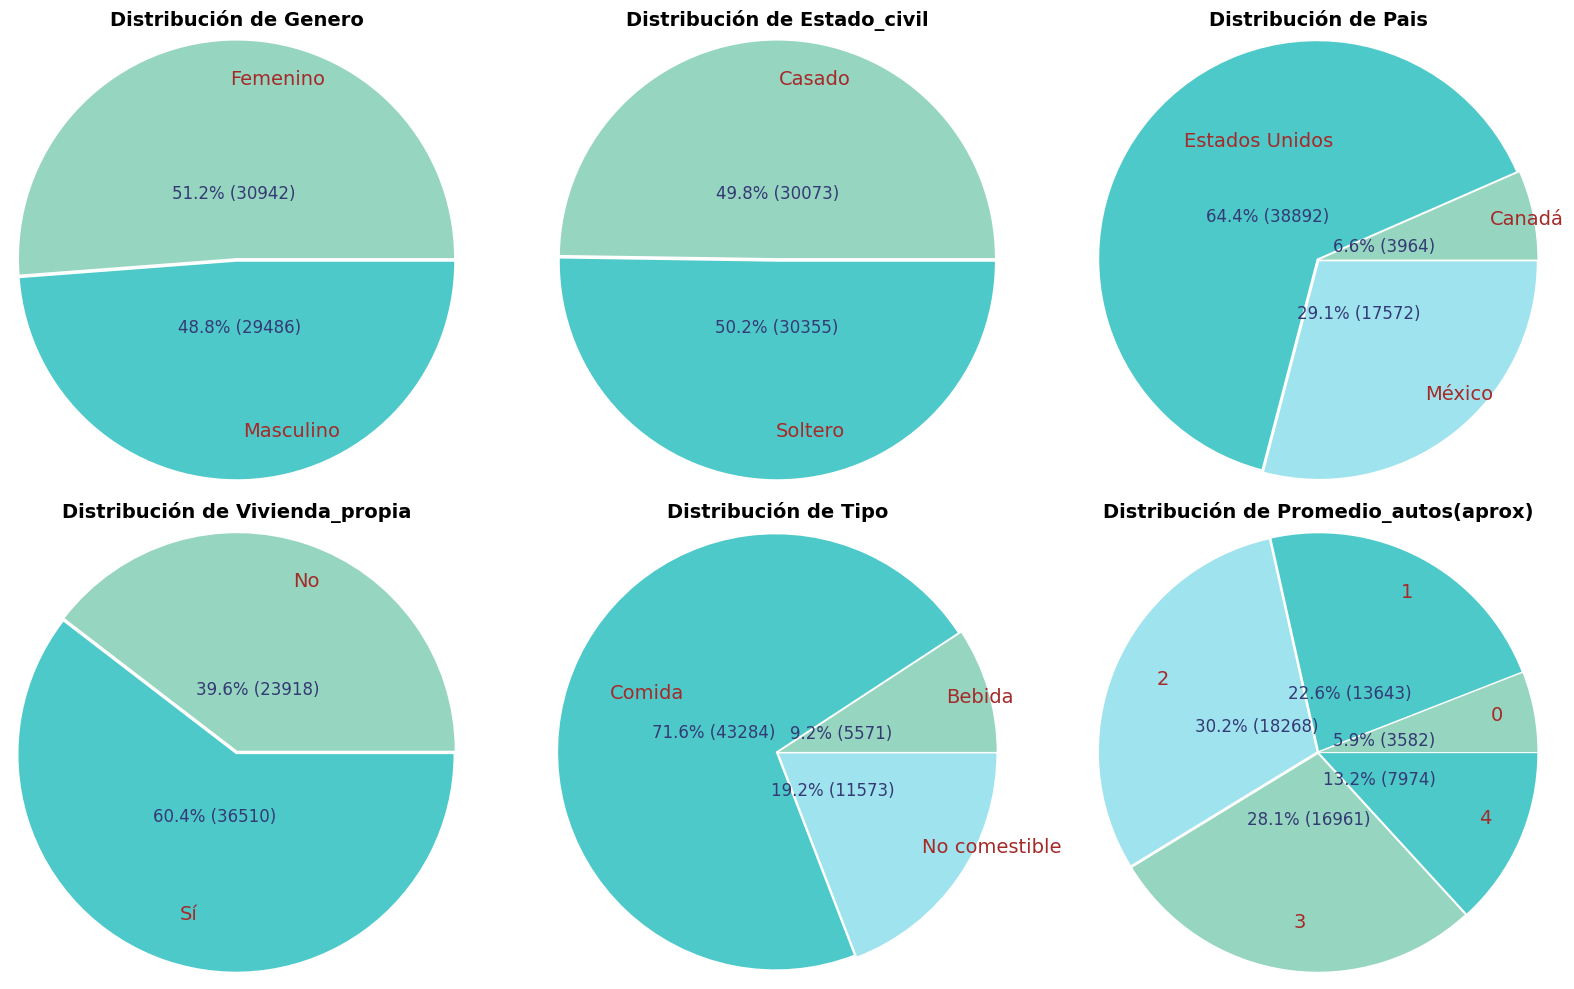

In [17]:
# Lienzo del gráfico
area = plt.figure(figsize=(16,10))
G1 = area.add_subplot(2,3,1)
G2 = area.add_subplot(2,3,2)
G3 = area.add_subplot(2,3,3)
G4 = area.add_subplot(2,3,4)
G5 = area.add_subplot(2,3,5)
G6 = area.add_subplot(2,3,6)

categorias_cortas(dataframe=df, columna="genero", ax=G1)
categorias_cortas(dataframe=df, columna="estado_civil", ax=G2)
categorias_cortas(dataframe=df, columna="pais", ax=G3)
categorias_cortas(dataframe=df, columna="vivienda_propia", ax=G4)
categorias_cortas(dataframe=df, columna="tipo", ax=G5)
categorias_cortas(dataframe=df, columna="promedio_autos(aprox)", ax=G6)

plt.tight_layout()
plt.show();

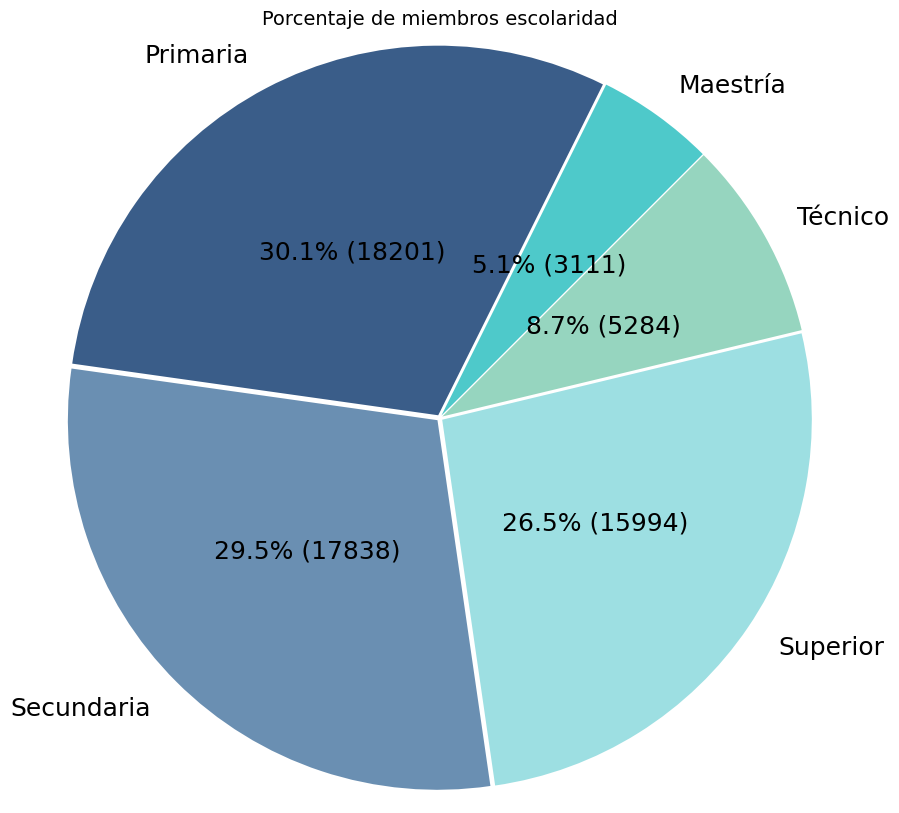

In [18]:
categorias_cortas(dataframe=df, columna="escolaridad")

## 4.- Preprocesamiento

### 4.1.- Transformación y selección de atributos

Para poder utilizar toda la información del dataframe, es de suma importancia codificar las variables categoricas en valores que puedan ser reconocidos por los algoritmos, ya que no pueden procesar cadenas de texto.

In [19]:
# Observamos nuestro datos para elegir que variables son mas representativas para nuestra meta.
df.sample(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
30795,Postres congelados,Alimentos congelados,Comida,5.30,1.6960,2.0,Ganadores de precios,México,Soltero,Femenino,5,Secundaria,Bronce,Obrero,Sí,3,40000,0,Carrington,2.65,17.70,14.70,1,1.0,18.0,Supermercado mediano,Hidalgo,Zacatecas,38382.0,30351.0,4819.0,3213.0,0.0,0.0,0.0,0.0,0.0,Anexo del producto,86.79
41024,Pan,Productos horneados,Comida,6.00,2.7000,4.0,Adiós bebé,México,Casado,Femenino,5,Secundaria,Oro,Profesional,Sí,3,120000,5,Fantastic,1.50,7.94,4.94,1,0.0,28.0,Supermercado mediano,Mexico City,DF,36509.0,22450.0,8435.0,5624.0,0.0,0.0,0.0,0.0,0.0,Periódico dominical,141.39
20200,Especialidades,Productos frescos,Comida,6.33,2.3421,3.0,Venta de un día,Estados Unidos,Soltero,Masculino,4,Secundaria,Bronce,Profesional,No,3,80000,0,High Top,2.11,10.90,7.89,0,1.0,15.0,Supermercado gourmet,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio, televisión",85.88


**Segmentación** <br>
Algunas variables no necesita ser codificadas debido a que ya son del tipo númerico, por lo cual el Dataframe será seccionado en variables númericas y categoricas.

In [20]:
# Realizamos la distinción entre variables del tipo númericas y aquellas categoricas

variables_numericas = df.select_dtypes(include=["float64", "int64", "int32"])
variables_categoricas = df.select_dtypes(include=["object"])


#### 4.1.1- Segmentación variables númericas

Una ventaja de tener variables númericas es que podemos observar su respectiva correlación, en otras palabras es la relación en que una variable tiene con otra, y pueden tener una relación tanto: *Positiva* (+1), *Negativa* (-1) o *Nula* (0).

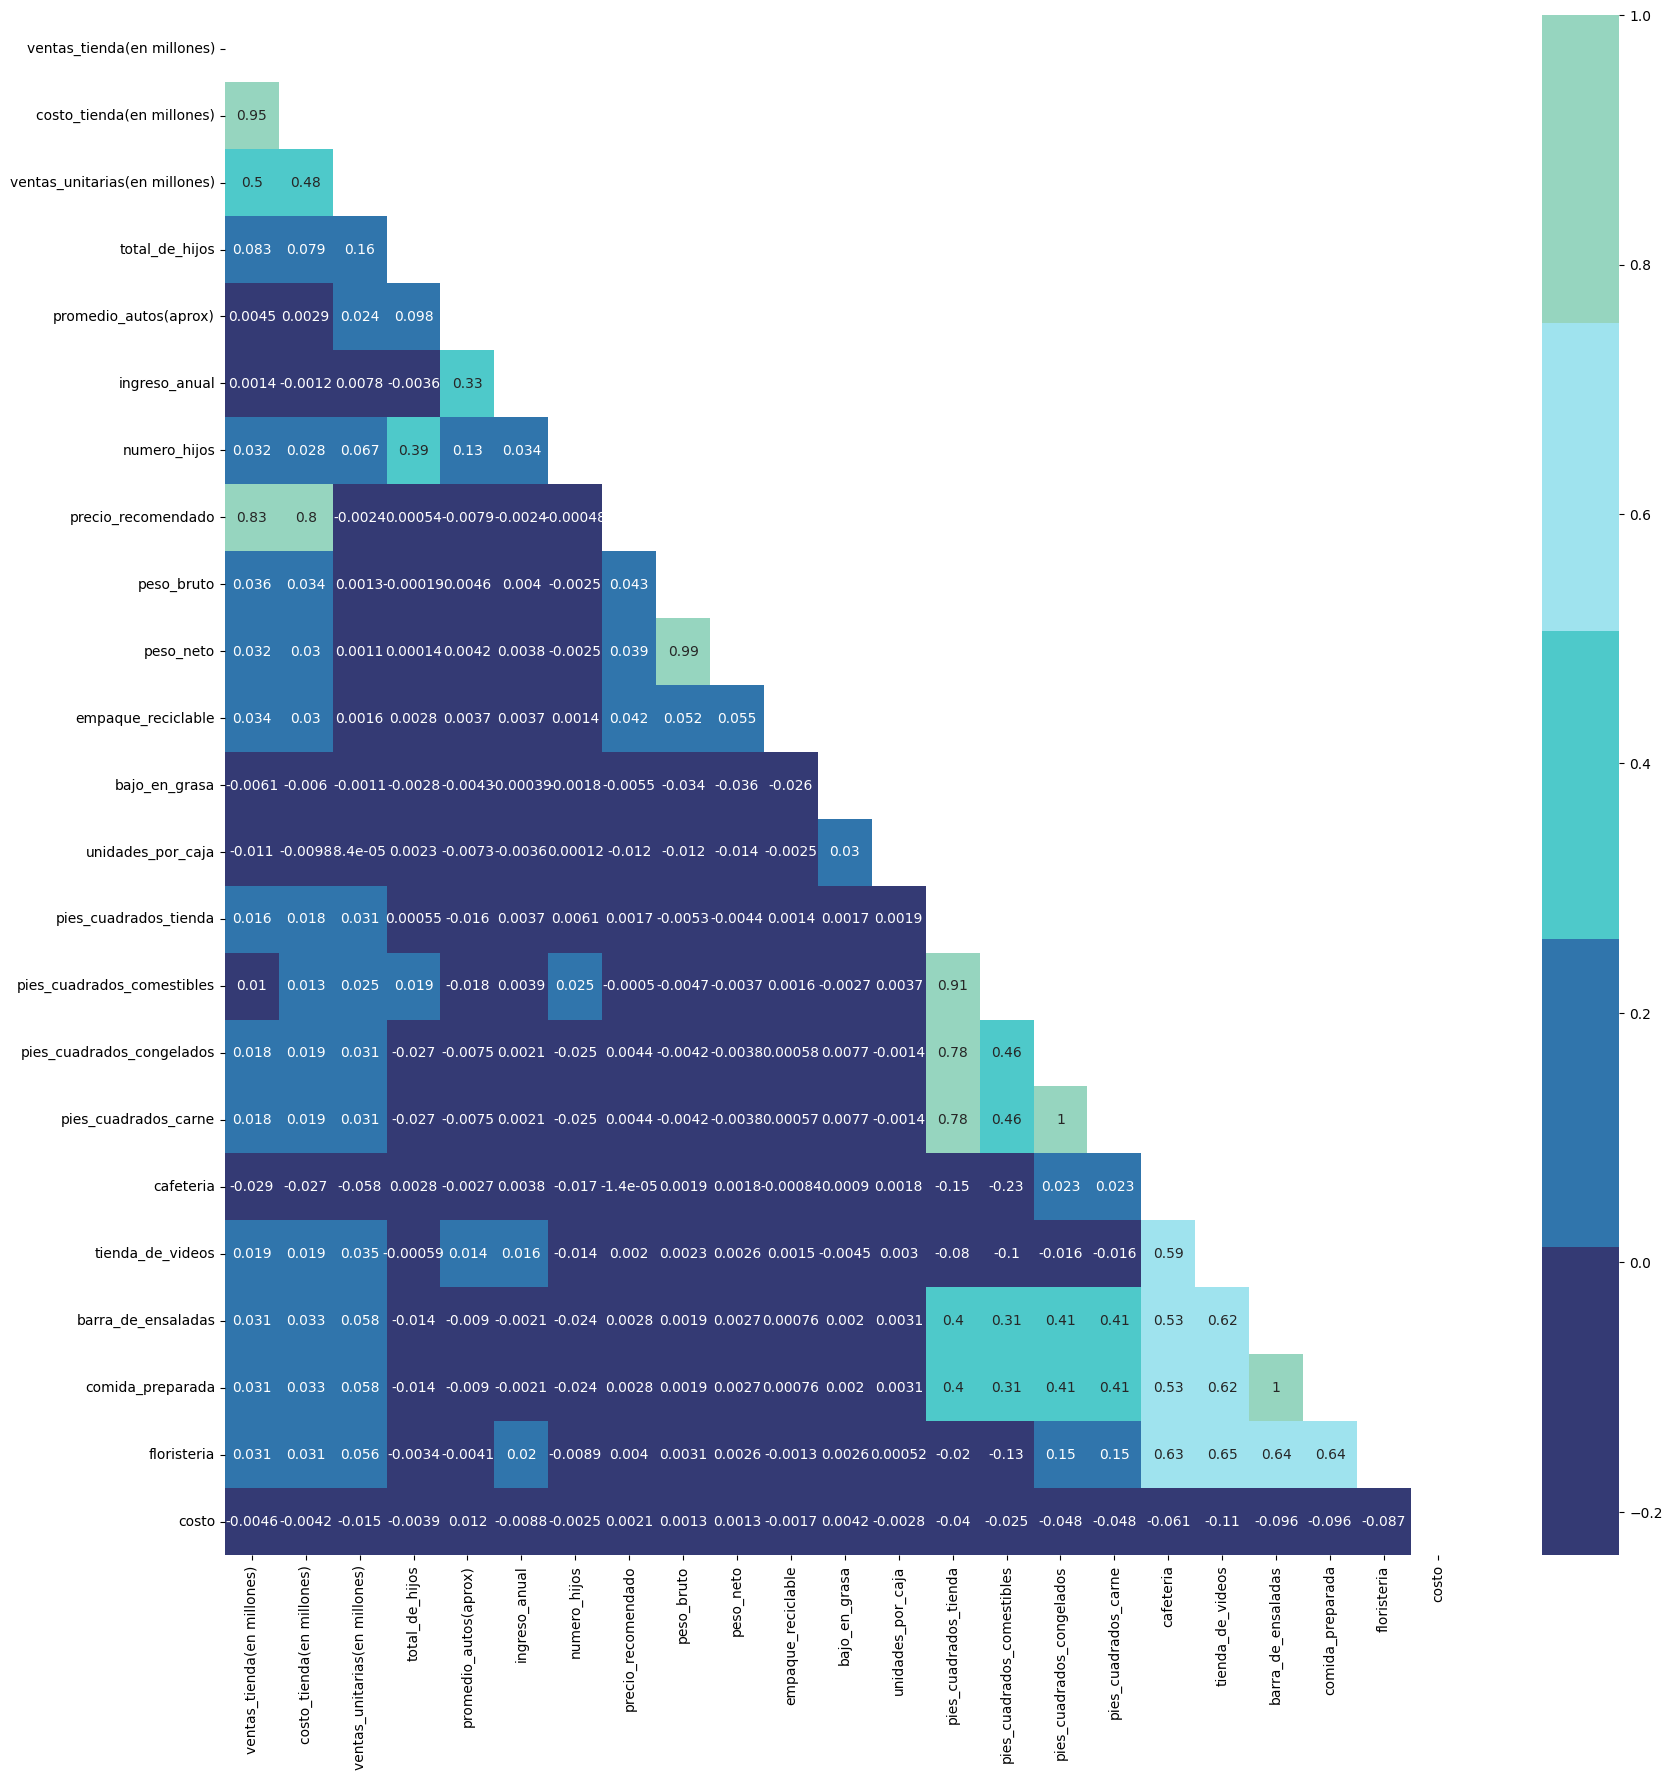

In [21]:
# Para comprender de una mejor manera la relación entre las variables
# se creará un mapa de calor con las variables númericas.

plt.figure(figsize=(20,20))
palette = ["#343A74", "#3075AC", "#4EC9CA","#9FE3EE","#96D5BF"]
mask = np.triu(np.ones_like(variables_numericas.corr(), dtype=bool))
sns.heatmap(data=variables_numericas.corr(),annot=True, cmap=palette, mask=mask)
plt.show()

Cómo podemos observar en el mapa de calor, algunas variables muestran una correlación cercana a 1, lo que nos índica que ambas variables están aportando la misma información, por lo cuál aquellas variables dónde la correlación sea mayor de 85 se considerarán iguales y aquella más relevante será conservada y la otra será eliminada.<br>
En este caso las variables a eliminar serán las siguientes:<br>
**Peso_Bruto** <br>
**Costo_tienda** <br>
**Pies_cradrados_comestibles** <br>
**Barra_de_ensaladas** <br>


**Eliminación de variables númericas**

In [22]:
# Eliminamos aquellas columnas que resultan redundantes.
variables_numericas = variables_numericas.drop(columns=["peso_bruto", "costo_tienda(en millones)","pies_cuadrados_comestibles", "barra_de_ensaladas"])

**Selección de variables númericas** <br>
En esta sección elegiremos y trataremos, las variables númericas para nuestro modelo

In [23]:
variables_numericas.sample(10)

,ventas_tienda(en millones),ventas_unitarias(en millones),total_de_hijos,promedio_autos(aprox),ingreso_anual,numero_hijos,precio_recomendado,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,pies_cuadrados_tienda,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,comida_preparada,floristeria,costo
894,5.85,3.0,3,4,40000,1,1.95,7.10,1,1.0,35.0,39696.0,9184.0,6122.0,0.0,0.0,1.0,0.0,106.20
33418,4.90,2.0,3,1,20000,0,2.45,9.00,1,1.0,34.0,21215.0,4746.0,3164.0,1.0,0.0,0.0,0.0,99.77
48992,5.30,2.0,5,4,60000,5,2.65,7.39,0,0.0,20.0,23112.0,4016.0,2678.0,1.0,1.0,1.0,1.0,51.00
26944,5.04,4.0,0,2,120000,0,1.26,6.09,0,0.0,31.0,39696.0,9184.0,6122.0,0.0,0.0,1.0,0.0,123.02
38863,7.53,3.0,1,2,60000,0,2.51,6.31,0,1.0,7.0,34791.0,5062.0,3375.0,0.0,0.0,1.0,0.0,125.48
48794,5.30,2.0,4,2,60000,4,2.65,7.39,0,0.0,20.0,28206.0,3561.0,2374.0,1.0,0.0,0.0,0.0,77.70
10433,3.24,4.0,3,3,140000,1,0.81,4.32,1,1.0,20.0,33858.0,7041.0,4694.0,1.0,0.0,1.0,1.0,73.05
52491,5.55,3.0,1,1,60000,0,1.85,15.50,0,0.0,8.0,27694.0,5415.0,3610.0,1.0,1.0,1.0,1.0,82.62
55873,1.64,2.0,1,3,40000,0,0.82,18.20,0,0.0,34.0,33858.0,7041.0,4694.0,1.0,0.0,1.0,1.0,139.37
55049,7.89,3.0,2,2,40000,0,2.63,15.10,0,0.0,16.0,21215.0,4746.0,3164.0,1.0,0.0,0.0,0.0,131.46


In [24]:
# Selección de variables Númericas
variables_numericas_elegidas = variables_numericas[["ingreso_anual", "total_de_hijos", "promedio_autos(aprox)"]].copy()


In [25]:
# Mostramos el resultado de nuestra selección
variables_numericas_elegidas.sample(3)

,ingreso_anual,total_de_hijos,promedio_autos(aprox)
7304,60000,3,2
45129,40000,5,3
40224,40000,1,3


**Selección de variables categoricas** <br>
Continuaremos seleccionando y tratando aquellas variables categoricas para nuestro modelo

In [26]:
variables_categoricas.sample(3)

,categoria_alimento,departamento,tipo,promocion,pais,estado_civil,genero,escolaridad,miembro,ocupacion,vivienda_propia,marca,comercio,ciudad,estado,divulgacion
6644,Vegetales,Productos frescos,Comida,Super Ahorradores,Canadá,Soltero,Femenino,Maestría,Bronce,Profesional,Sí,Ebony,Supermercado mediano,Victoria,BC,"Periódico diario, radio"
48360,Alimentos para el desayuno,Alimentos para el desayuno,Comida,Descuentos de gran magnitud,Estados Unidos,Casado,Masculino,Primaria,Normal,Técnico,Sí,Radius,Supermercado de lujo,Salem,OR,"Periódico diario, radio"
60347,Especialidades,Carrusel,No comestible,Ahorradores de dinero,México,Soltero,Femenino,Superior,Bronce,Gestión,Sí,Symphony,Supermercado de lujo,Merida,Yucatan,Televisión


In [27]:
# Selección de variables categoricas
# Algunas variables no serán tratatadas como dummies ya serán tratados con datos de magnitud.
variables_no_dummies = variables_categoricas[["escolaridad", "miembro", "ocupacion"]].copy()
variables_dummies = variables_categoricas[["tipo"]].copy()

# Diccionarios para tratar variables categoricas en númericas
escolaridades = {"Primaria":1, "Secundaria":2, "Técnico":3, "Superior":4, "Maestría":5}
miembros = {"Normal":1, "Bronce":2, "Plata":3, "Oro":4}
ocupaciones = {"Obrero":1, "Técnico":2, "Cargo de Oficina":3, "Profesional":4, "Gestión":5}
  
# Tratamiento de variables categoricas
variables_no_dummies["escolaridad"] = variables_no_dummies["escolaridad"].replace(escolaridades)
variables_no_dummies["miembro"] = variables_no_dummies["miembro"].replace(miembros)
variables_no_dummies["ocupacion"] = variables_no_dummies["ocupacion"].replace(ocupaciones)

# Conversión de variables a dummies
variables_dummies = pd.get_dummies(variables_dummies, dtype=int)

# Consolodación de variables categoricas en un unico dataframe
categorias_codificadas = pd.concat([variables_no_dummies, variables_dummies], axis=1)

In [28]:
categorias_codificadas.sample(3)

,escolaridad,miembro,ocupacion,tipo_Bebida,tipo_Comida,tipo_No comestible
55385,4,2,5,0,1,0
1942,1,1,2,0,1,0
6960,1,1,2,0,1,0


In [29]:
# Una vez tenemos las variables elegidas tratadas y que considero relevantes 
# procedemos a realizar consolidación de un solo Dataframe con ambos tipos de variables

df_consolidado = pd.concat([variables_numericas_elegidas, categorias_codificadas], axis=1)
df_consolidado.sample(5)

,ingreso_anual,total_de_hijos,promedio_autos(aprox),escolaridad,miembro,ocupacion,tipo_Bebida,tipo_Comida,tipo_No comestible
21585,20000,3,2,1,1,2,0,1,0
35320,20000,4,0,1,1,2,0,1,0
54312,20000,3,1,1,1,1,0,0,1
34987,100000,1,2,4,4,4,0,0,1
18993,40000,1,2,1,4,2,0,1,0


### 4.2.- Estandarización de valores

In [30]:
## Para estandarizar todos los valores entre 0 y 1

from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_consolidado)

In [32]:
datos_estandarizados = pd.DataFrame(X_std)
datos_estandarizados.columns = df_consolidado.columns.to_list()
df_prueba = datos_estandarizados.copy()
datos_estandarizados.sample(3)

,ingreso_anual,total_de_hijos,promedio_autos(aprox),escolaridad,miembro,ocupacion,tipo_Bebida,tipo_Comida,tipo_No comestible
8714,1.154985,0.312804,0.720714,1.946256,-0.118889,0.772917,-0.318677,0.62935,-0.486708
17274,0.600871,-1.029341,0.720714,1.176971,-0.118889,0.772917,-0.318677,0.62935,-0.486708
28701,1.154985,0.983876,-1.081682,1.946256,-0.118889,0.772917,-0.318677,-1.58894,2.054620


## 5. Clusterización y validación

1. El algoritmo recomendado para la clusterización es **KMeans**, sin embargo, hay libertad de utilizar cualquier otro algoritmo como *Mean Shift* o, incluso, *DBSCAN*. Lo importante es hallar el mejor número de clusters.

**Validación**

2. Número de clusters: Debes instanciar de 3 a máximo 10 clusters con el(los) algoritmo(s) seleccionado(s), utilizando X_std y obtener cómo mínimo el puntaje de Silhouette, aunque te recomiendo utilizar otras métricas como Davies-Bouldin y Calinski and Harabasz para que puedas decidir cuál es la mejor configuración para el número de clusters.

La variable Silhouette toma valores desde -1 a 1. <br> 
- Los valores cercanos a 1 indican que los clusters están bien asignados. 
- Los valores cercanos a -1 indican que los datos han sido asignados a clusters incorrectos. 
- Los valores cercanos a 0 significan que los clusters se superponen uno con otro

La variable Davies-Bouldin:   
- Mientrás más bajo se el valor indica una mejor clusterización, siendo 0 el ideal

La variable Calinski and Harabasz:
- Entre más alto sea el valor mejor, ya que es una mejor clusterización.

**RESTRICCIONES** <br>
El puntaje mínimo debe ser:
 - Silhouette debe ser de 0.50. 
 - Davies-Bouldin máximo de 0.75; 
 - CalinskiHarabasz, el número más alto posible.

In [33]:
# Librerías para procesamientos de clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


**Clusterización con datos estandarizados**

In [34]:
# Ahora calcularemos clusters en nuestros datos

# Crearemos una lista vacia donde guardaremos todos los valores de inercia
resultados_metricas=[]
SEED = 24
# ahora probaremos la inercia para cierto número de cluster, pero no tienen
# que ser muchos porque no es últil generar muchos
for k in range(3,11):
    # Instanciamos el modelo con un número de CLusters K
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state = SEED)
    # Ajustamos los datos con los datos de la función
    kmeans.fit(X=X_std)
    # Generaremos una columna con los labels generados por el algoritmo
    cluster_labels = kmeans.labels_

    # Calculo de metrícas 
    silhouette = silhouette_score(X_std, cluster_labels, metric="euclidean")
    davies_bouldin = davies_bouldin_score(X_std, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_std, cluster_labels)

    # Estructura de datos necesaria

    resultados_metricas.append({"Cluster": k,
                                "Silhouette": silhouette,
                                "Davies-Bouldin": davies_bouldin,
                                "Calinski-Harabasz": calinski_harabasz,
                                "Inercia":kmeans.inertia_})

columns=['Cluster', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'Inercia']
df_metricas_estandarizadas = pd.DataFrame(resultados_metricas, columns=columns)

In [35]:
# Mostramos las métricas obtenidas para cada número de clusters probado
df_metricas_estandarizadas

,Cluster,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inercia
0,3,0.250291,1.497015,17819.460489,342087.401444
1,4,0.309820,1.227703,20003.284448,272861.096240
2,5,0.262747,1.273791,18571.152046,243944.420359
3,6,0.278395,1.287608,17777.618633,220083.082447
4,7,0.284605,1.349254,17266.318453,200343.250348
5,8,0.269034,1.350691,16325.224895,188094.918164
6,9,0.273593,1.380472,15717.914235,176507.274423
7,10,0.267590,1.346020,15124.553571,167187.612407


**Cluzterización con datos No estandarizados**

In [36]:
# Ahora calcularemos clusters en nuestros datos

# Crearemos una lista vacia donde guardaremos todos los valores de inercia
resultados_metricas=[]
SEED = 24
# ahora probaremos la inercia para cierto número de cluster, pero no tienen
# que ser muchos porque no es últil generar muchos
for k in range(3,11):
    # Instanciamos el modelo con un número de CLusters K
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state = SEED)
    # Ajustamos los datos con los datos de la función
    kmeans.fit(X=df_consolidado)
    # Generaremos una columna con los labels generados por el algoritmo
    cluster_labels = kmeans.labels_

    # Calculo de metrícas 
    silhouette = silhouette_score(df_consolidado, cluster_labels, metric="euclidean")
    davies_bouldin = davies_bouldin_score(df_consolidado, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(df_consolidado, cluster_labels)

    # Estructura de datos necesaria

    resultados_metricas.append({"Cluster": k,
                                "Silhouette": silhouette,
                                "Davies-Bouldin": davies_bouldin,
                                "Calinski-Harabasz": calinski_harabasz,
                                "Inercia":kmeans.inertia_})

columns=['Cluster', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'Inercia']
df_metricas = pd.DataFrame(resultados_metricas, columns=columns)


In [37]:
# Mostramos las métricas obtenidas para cada número de clusters probado
df_metricas

,Cluster,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inercia
0,3,0.697609,0.493429,2.448591e+05,8.646511e+12
1,4,0.722267,0.400456,3.014343e+05,4.930660e+12
2,5,0.911229,0.273129,5.251395e+05,2.201158e+12
3,6,0.944947,0.297956,1.065073e+06,8.831734e+11
4,7,0.978070,0.159769,2.249258e+06,3.508790e+11
5,8,0.999844,0.000236,2.014949e+12,3.372240e+05
6,9,0.764025,0.325020,1.957744e+12,3.044429e+05
7,10,0.656505,0.522981,1.852893e+12,2.862101e+05


### 5.1.- Regla del codo y matemática

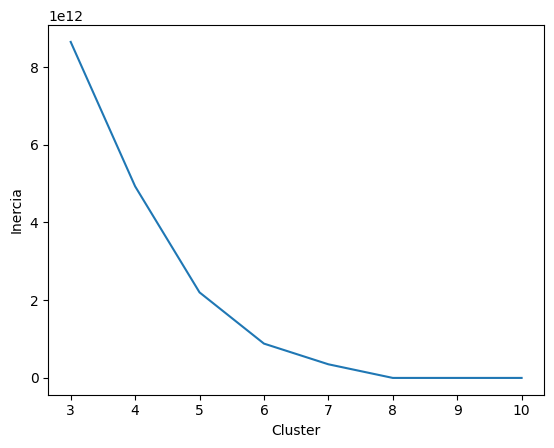

In [38]:
sns.lineplot(data=df_metricas, x="Cluster", y="Inercia")
plt.show()

In [39]:
# Definimos una función para la regla

def numero_ideal_cluster(inercia):
    # variables de la escuación
    x1, y1 = 2, inercia[0]
    x2, y2 = 20, inercia[-1]

    # Generamos una lista donde guardaremos los valores de las distancias
    distance = []

    # Loop para obtener las distancias de todos los puntos de Inercia
    for i in range(len(inercia)):

        # Aquí obtenemos las coordenadas de cada punto
        x0 = i + 2
        y0 = inercia[i]

        # En la siguiente parte se calcularán las partes de la escuación, solo
        # hay una pequeña modificación y es que los indices son los siguientes:
        # x = x0, x0=x1, x1=x2, esto para no tener conflicto con otras variables
        # de este notebook

        # Aquí se calcula el numerador de la ecuación
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        # Aquí se calcula el denominador de la escuación
        denominator = ((y2 - y1)**2 + (x2-x1)**2)**(1/2)
        # Agregamos el resultado de la ecuación a la lista de distancia
        distance.append(numerator/denominator)
    
    # Sólo nos retornará el número "i" con la mayor distancia calculada, después
    # de 2 clusters, ya que nuestra función comienza desde 2 y no de 0 clusters
    
    return distance.index(max(distance)) + 2

In [40]:
# Ahora calcularemos las distancias con nuestra función
data_inercia =df_metricas["Inercia"].to_list()
print(f"El número ideal de clusters es: {numero_ideal_cluster(inercia=data_inercia)}")

El número ideal de clusters es: 6


Cómo resultado de la clusterización se encontró que es mucho más beneficioso para los fines de este estudio, el trabajar con los datos en crudo, ya que el procesamiento de los datos al estandarizarlos provoca que sea muy complejo el poder distinguir entre los mismos, conllevando a que sea mucho más díficil el asignarles algún cluster a un grupo definido de datos. <br>

Con lo anterior, se llegó a la conclusión que el número de Cluster elegido para continuar serán **6**

### 5.2.- Estructura de datos

Para asegurarnos que nuestros datos están performando de la mejor manera ahora probaremos el mismo procedimiento anterior con datos aleatorios, para evaluar la estructura de los clusters y que nuestros datos tengan mejor estructura, se generará el mismo procedimiento, tomando como referencia una baseline de datos aleatorios con las mismas dimensiones de registros y variables. 

In [41]:
datos_estandarizados.shape

(60428, 9)

Ahora que conozcemos la estructura de nuestros datos procederemos a generar un set de datos con la mismas dimensionalidad:

In [42]:
random_data = np.random.rand(60428, 9)

In [43]:
random_data.shape

(60428, 9)

Ahora ya tenemos un set de datos con la misma cantidad de variables y registros, con lo cual procederemos a realizar el mismo procedimiento de clusterización y observar sí las metrícas performan de igual manera con datos aleatorios o sí tienen un desempeño mejor o peor.

In [44]:
# Crearemos una lista vacia donde guardaremos todos los valores de inercia
resultados_metricas=[]
SEED = 24
# ahora probaremos la inercia para cierto número de cluster, pero no tienen
# que ser muchos porque no es últil generar muchos
for k in range(3,11):
    # Instanciamos el modelo con un número de CLusters K
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state = SEED)
    # Ajustamos los datos con los datos de la función
    kmeans.fit(X=random_data)
    # Generaremos una columna con los labels generados por el algoritmo
    cluster_labels = kmeans.labels_

    # Calculo de metrícas 
    silhouette = silhouette_score(random_data, cluster_labels, metric="euclidean")
    davies_bouldin = davies_bouldin_score(random_data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(random_data, cluster_labels)

    # Estructura de datos necesaria

    resultados_metricas.append({"Cluster": k,
                                "Silhouette": silhouette,
                                "Davies-Bouldin": davies_bouldin,
                                "Calinski-Harabasz": calinski_harabasz,
                                "Inercia":kmeans.inertia_})

columns=['Cluster', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'Inercia']
df_metricas_random = pd.DataFrame(resultados_metricas, columns=columns)

In [45]:
df_metricas_random

,Cluster,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inercia
0,3,0.071700,2.906088,4710.078119,39200.807747
1,4,0.073816,2.792019,4292.395579,37351.946414
2,5,0.072382,2.533194,3908.933606,35997.083580
3,6,0.072222,2.385515,3645.090707,34811.684066
4,7,0.074064,2.264728,3458.284196,33728.967830
5,8,0.076121,2.134789,3308.303541,32756.853134
6,9,0.075680,2.075114,3158.868743,31949.064466
7,10,0.076451,1.999210,3040.446386,31187.105924


Cómo podemos observar, las metrícas obtenidas para un dataset aleatorio con las mismas dimensiones, son muy diferentes y sobre todo muy malas, afirmando que nuestras variables tiene mucha mejor estructura e información para realizar la clusterización.

### 5.3.- Estabilidad de los datos

Ahora se va a evaluar la estabilidad de los clusters con el número de clusters seleccionado que para este caso fueron **6**. Para ello, se segmentarán nuestros datos en 3 o 5 partes iguales, (puedes apoyarte en la función array_split() de numpy, y almacenar cada fragmento del dataset en una variable llamada set_1, set_2, ..., set_n) y repetir los pasos de validación para el número de clusters escogido en cada uno de los sets.

In [46]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    sets_consolidados = np.split(df_consolidado, 4)

Una vez que obtuvimos los diferentes sets con los que trabajaremos para observar la estabilidad de nuestros datos, correremos el algoritmo de clasificación y observaremos sí las métricas son constantes a lo largo de los mismos sets.

In [47]:
# Crearemos una lista vacia donde guardaremos todos los valores de inercia
resultados_metricas=[]
SEED = 24
# ahora probaremos la inercia para cierto número de cluster, pero no tienen
# que ser muchos porque no es últil generar muchos
for set in sets_consolidados:
    # Instanciamos el modelo con un número de CLusters K
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state = SEED)
    # Ajustamos los datos con los datos de la función
    kmeans.fit(X=set)
    # Generaremos una columna con los labels generados por el algoritmo
    cluster_labels = kmeans.labels_

    # Calculo de metrícas 
    silhouette = silhouette_score(set, cluster_labels, metric="euclidean")
    davies_bouldin = davies_bouldin_score(set, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(set, cluster_labels)

    # Estructura de datos necesaria

    resultados_metricas.append({"Cluster": k,
                                "Silhouette": silhouette,
                                "Davies-Bouldin": davies_bouldin,
                                "Calinski-Harabasz": calinski_harabasz,
                                "Inercia":kmeans.inertia_})

columns=['Cluster', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'Inercia']
df_metricas_sets= pd.DataFrame(resultados_metricas, columns=columns)

In [48]:
# Realizamos la impresión de nuestras metricas para corroborar nuestra hipótesis
df_metricas_sets

,Cluster,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inercia
0,10,0.945819,0.297566,267475.585873,2.184816e+11
1,10,0.944856,0.298375,265088.269929,2.197371e+11
2,10,0.945671,0.297318,270162.516014,2.151117e+11
3,10,0.943430,0.297967,262703.047130,2.294272e+11


Aquí lo verdaderamente importante es que los puntajes no presenten una variación mayor a ±5% entre sí. Esto va a garantizar que hay homogeneidad en la composición de los clusters, y cómo nuestros datos cumplen con estas varianzas podemos decir que es estable la clusterización.

### 5.4.- Instanciando Clusterización

Ahora que ya observamos que nuestros datos son contantes podemos clusterizar nuestro dataset completo, elegiremos el número de "Clusters" que elegimos en los pasos anteriores que fue "6", ahora asignaremos los resultados de clusterización en una variable dentro del dataset de datos llamada "cluster" que contendrá el número de cluster asignado a cada registro.

In [49]:
# Crearemos una lista vacia donde guardaremos nuestras metrícas
resultados_metricas=[]
SEED = 24

# Instanciamos el modelo con un número de clusters de 6
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state = SEED)
# Ajustamos los datos con los datos de la función
kmeans.fit(X=df_consolidado)
# Generaremos una columna con los labels generados por el algoritmo
cluster_labels = kmeans.labels_
# Ahora añadiremos cada cluster a su respectivo registro en nuestro dataframe

df_consolidado["cluster"] = cluster_labels

# Calculo de metrícas 
silhouette = silhouette_score(df_consolidado, cluster_labels, metric="euclidean")
davies_bouldin = davies_bouldin_score(df_consolidado, cluster_labels)
calinski_harabasz = calinski_harabasz_score(df_consolidado, cluster_labels)

# Estructura de datos necesaria

resultados_metricas.append({"Cluster": k,
                            "Silhouette": silhouette,
                            "Davies-Bouldin": davies_bouldin,
                            "Calinski-Harabasz": calinski_harabasz,
                            "Inercia":kmeans.inertia_})

columns=['Cluster', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'Inercia']
df_metricas_consolidado= pd.DataFrame(resultados_metricas, columns=columns)

In [50]:
df_metricas_consolidado

,Cluster,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inercia
0,10,0.944947,0.297956,1.065073e+06,8.831734e+11


In [51]:
# Traducción de variables númericas a categoricas

# Diccionarios para tratar variables categoricas en númericas
escolaridades_categoricas = {1:"Primaria", 2:"Secundaria", 3:"Técnico", 4:"Superior", 5:"Maestría"}
miembros_categoricas = {1:"Normal", 2:"Bronce", 3:"Plata", 4:"Oro"}
ocupaciones_categoricas = {1:"Obrero", 2:"Técnico", 3:"Cargo de Oficina", 4:"Profesional", 5:"Gestión"}
  
# Tratamiento de variables categoricas
df_consolidado["escolaridad"] = df_consolidado["escolaridad"].replace(escolaridades_categoricas)
df_consolidado["miembro"] = df_consolidado["miembro"].replace(miembros_categoricas)
df_consolidado["ocupacion"] = df_consolidado["ocupacion"].replace(ocupaciones_categoricas)

### 5.5.- Dispersión de clusters

Se realizarán varios gráficos de dispersión para comparar las variables añadiendo una tercera dimensión con los clusters en el parámetro "hue" del gráfico con lo cual podrá ser facilmente observable como se distribuyen los diferentes clusters asignados.

In [52]:
# Función para recrear el mismo tipo de gráfico al lo largo del presente estudio.
def grafico_despercion(dataframe,columna_x, columna_y):
    '''función encargada de graficar un scatterplot'''
    palette_scatter = sns.blend_palette(["#343A74","#4EC9CA","#9FE3EE","#96D5BF","#3075AC", "Black"], as_cmap=False, n_colors=6)
    sns.scatterplot(data=dataframe, x=columna_x, y=columna_y, hue="cluster", palette=palette_scatter, size="cluster")
    plt.legend(loc=(1.03,0.7))
    plt.xlabel(columna_x.capitalize())
    plt.ylabel(columna_y.capitalize())
    plt.show()

**Ingreso anual vs promedio de autos**

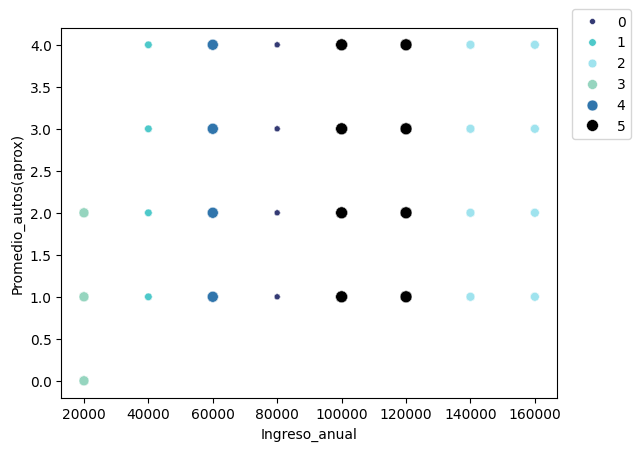

In [53]:
# Primer grafico para observar las distribución de clusters
grafico_despercion(dataframe=df_consolidado, columna_x="ingreso_anual", columna_y="promedio_autos(aprox)")

Cómo podemos observar en el gráfico anterior, la dsitribución de los Clusters con respecto a estas 2 variables se distribuyen de la siguiente manera:

- Cluster 0 = Tiene los datos con promedios de autos entre 1 y 4, con un ingreso de $80,000
- Cluster 1 = Tiene los datos con promedios de autos entre 1 y 4, con un ingreso de $40,000
- Cluster 2 = Tiene los datos con promedios de autos entre 1 y 4, con un ingreso entre $140,000 y $160,000
- Cluster 3 = Tiene los datos con promedios de autos entre 0 y 2, con un ingreso de $20,000
- Cluster 4 = Tiene los datos con promedios de autos entre 1 y 4, con un ingreso de $60,000
- Cluster 5 = Tiene los datos con promedios de autos entre 1 y 4, con un ingreso de $100,000 y $120,000


**Escolaridad vs Ocupación**

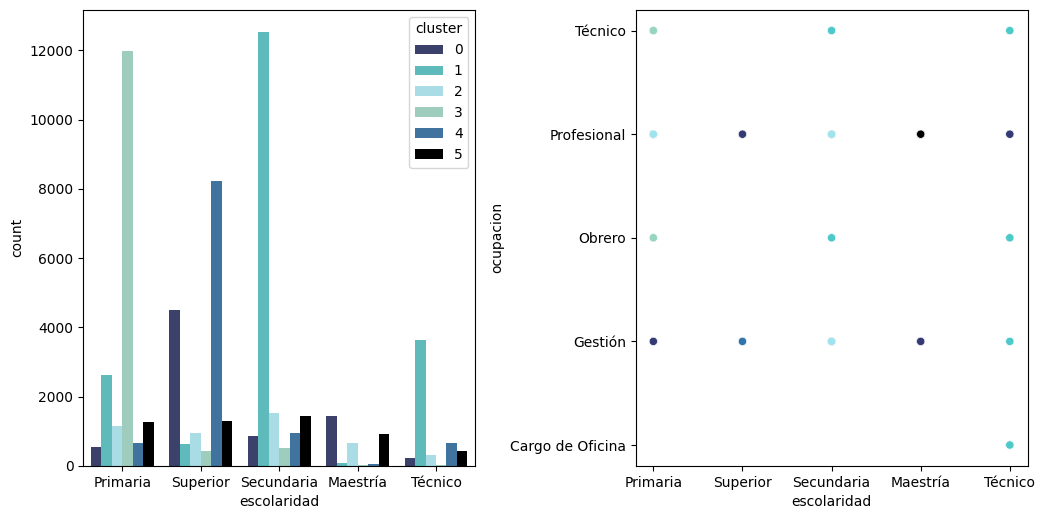

In [54]:
# Primer grafico para observar las distribución de clusters
# grafico_despercion(dataframe=df_consolidado, columna_x='escolaridad', columna_y="escolaridad")

area = plt.figure(figsize=(16,10))
x1 = area.add_subplot(2,3,1)
x2 = area.add_subplot(2,3,2)
palette_scatter = sns.blend_palette(["#343A74","#4EC9CA","#9FE3EE","#96D5BF","#3075AC", "Black"], as_cmap=False, n_colors=6)

sns.countplot(data=df_consolidado, x="escolaridad", hue="cluster", palette=palette_scatter,ax=x1)
sns.scatterplot(data=df_consolidado, x="escolaridad", hue="cluster", y='ocupacion', palette=palette_scatter, ax=x2)

x2.legend().remove()
plt.tight_layout()
plt.show();

Cómo podemos observar en el gráfico anterior, la dsitribución de los Clusters con respecto a estas 2 variables se distribuyen de la siguiente manera:

- Cluster 0 = Principalmente con una ocupación de Gestión y Profesional, y escolaridades principalmente de grado Superior
- Cluster 1 = Principalmente con una ocupación de Obrero y Técnico, y escolaridades principalmente de grado: Primaria, Secundaria y Técnico
- Cluster 2 = Principalmente con una ocupación de Gestión y Profesional, y escolaridades principalmente de grado: Primaria, Secundaria y maestría.
- Cluster 3 = Principalmente con una ocupación de Obrero y Técnico, y escolaridades principalmente de grado: Primaria, Secundaria
- Cluster 4 = Principalmente con una ocupación de Gestión, y escolaridades principalmente de grado: Superior y Secundaria
- Cluster 5 = Principalmente con una ocupación de Profesional, y escolaridades principalmente de grado: Primaria, Secundaria, Superior y Maestría

**Miembro vs Total de hijos**

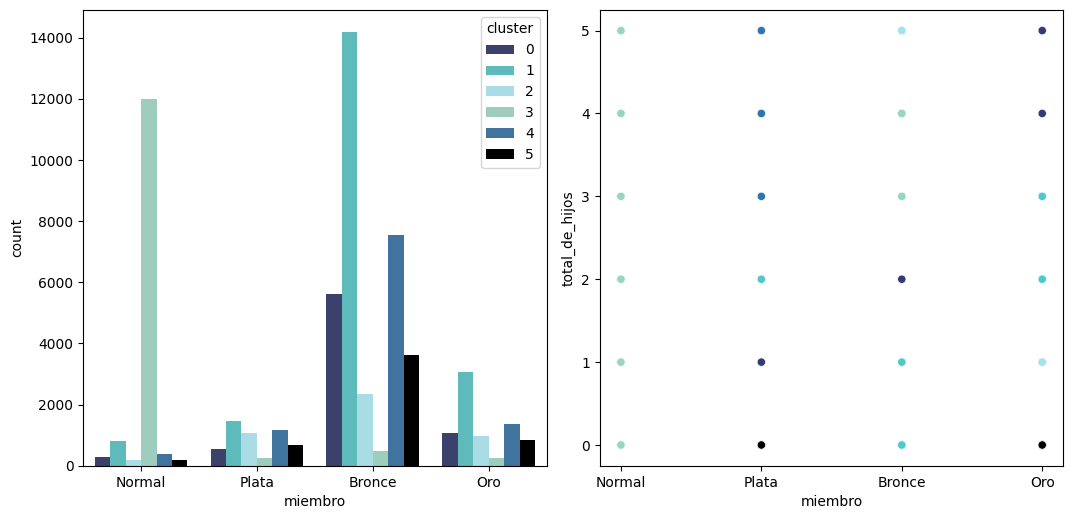

In [61]:
# Primer grafico para observar las distribución de clusters
# grafico_despercion(dataframe=df_consolidado, columna_x='escolaridad', columna_y="escolaridad")

area = plt.figure(figsize=(16,10))
x1 = area.add_subplot(2,3,1)
x2 = area.add_subplot(2,3,2)
palette_scatter = sns.blend_palette(["#343A74","#4EC9CA","#9FE3EE","#96D5BF","#3075AC", "Black"], as_cmap=False, n_colors=6)

sns.countplot(data=df_consolidado, x="miembro", hue="cluster", palette=palette_scatter,ax=x1)
sns.scatterplot(data=df_consolidado, x="miembro", hue="cluster", y='total_de_hijos', palette=palette_scatter, ax=x2)

x2.legend().remove()
plt.tight_layout()
plt.show();

Cómo podemos observar dentro de los graficos anteriores la mayor cantidad de datos se centran en miembros bronce y en clienes normales con 3 hijos.

- cluster 0 = Compuesto por clientes miembros plata, bronce y oro con, entre 1 y 2 hijos.
- cluster 1 = Compuesto por clientes miembros plata, bronce y oro con, 0 y 3 hijos.
- cluster 2 = Compuesto por clientes miembros bronce con 5 hijos y oro con 1 hijo.
- cluster 3 = Compuesto por clientes normales con entre 0 y  5 hijas, ademas miembros bronce con entre 3 y 4 hijos
- cluster 4 = Compuesto por clientes miembros plata con entre 3 y 5 hijos, miembros bronce con entre 0 y 1 hijo, además de miembros oro con entre 2 y 4 hijos
- cluster 5 = Compuesto por clientes miembros plata y oro con entre 0 y 1 hijos ó 5 hijos, además de miembros Bronce con 2 hijos

**Tratamiento variables dummies**

Para poder observar la distribución de clusters para las variables que fueron codificadas comomo dummies, se trataran a sus datos originales, para observar como fueron distribuidas durante la clusterización.

In [57]:
bebidas = {1:"Bebida", 0:np.nan}
Comidas = {1:"Comida", 0:np.nan}
No_comestibles = {1:"No comestible", 0:np.nan}


# Tratamiento de datos

df_consolidado["tipo_Bebida"] = df_consolidado["tipo_Bebida"].replace(bebidas)
df_consolidado["tipo_Comida"] = df_consolidado["tipo_Comida"].replace(Comidas)
df_consolidado["tipo_No comestible"] = df_consolidado["tipo_No comestible"].replace(No_comestibles)

# Concatenamos las 3 columnas
df_consolidado["tipo"] = df_consolidado["tipo_Bebida"].fillna("") + df_consolidado["tipo_Comida"].fillna("") + df_consolidado["tipo_No comestible"].fillna("")

# Eliminamos ahora las columnas innecesarias

df_consolidado.drop(columns=["tipo_Bebida","tipo_Comida","tipo_No comestible"], axis=1, inplace=True)


**Tipo vs Ingreso Anual**

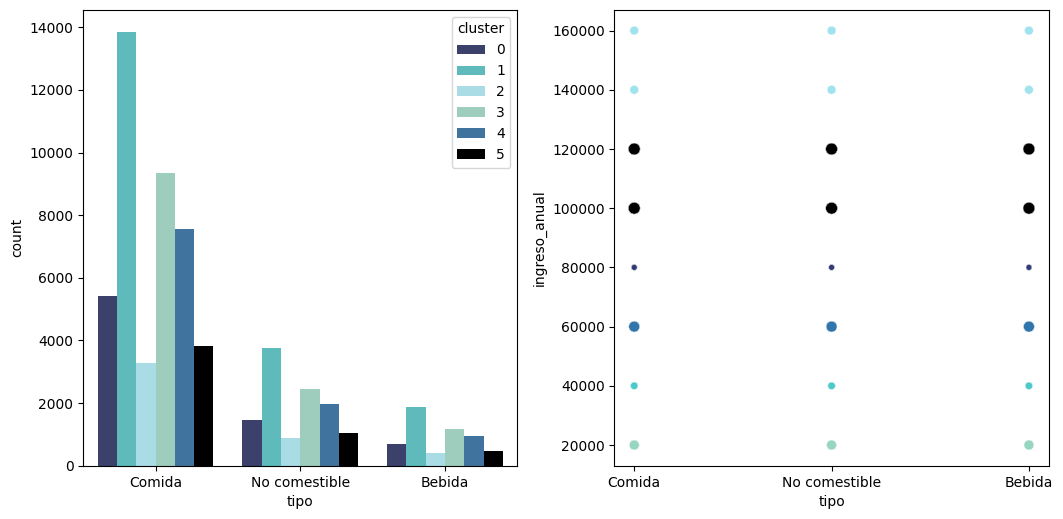

In [65]:
# 
area = plt.figure(figsize=(16,10))
x1 = area.add_subplot(2,3,1)
x2 = area.add_subplot(2,3,2)
palette_scatter = sns.blend_palette(["#343A74","#4EC9CA","#9FE3EE","#96D5BF","#3075AC", "Black"], as_cmap=False, n_colors=6)

sns.countplot(data=df_consolidado, x="tipo", hue="cluster", palette=palette_scatter,ax=x1)
sns.scatterplot(data=df_consolidado, x="tipo", hue="cluster", y='ingreso_anual', palette=palette_scatter, ax=x2, size="cluster")

x2.legend().remove()
plt.tight_layout()
plt.show();

En los graficos anteriores se puede observar que la distribución de los cluster por "Tipo" de productos esta muy afectada por la cantidad de ingresos, y que la mayor cantidad de registros están en aquellos productos de "Comida".

- Cluster 0 = Se centra en aquellos clientes con un ingreso medio de $80k para los 3 tipos de productos
- Cluster 1 = Se centra en aquellos clientes con un ingreso medio de $40k para los 3 tipos de productos
- Cluster 2 = Se centra en aquellos clientes con un ingreso medio de $140k-160k para los 3 tipos de productos
- Cluster 3 = Se centra en aquellos clientes con un ingreso medio de $20k para los 3 tipos de productos
- Cluster 4 = Se centra en aquellos clientes con un ingreso medio de $60k para los 3 tipos de productos
- Cluster 5 = Se centra en aquellos clientes con un ingreso medio de $100k-120k para los 3 tipos de productos

In [66]:
## Exportación de datos resultantes.

df_consolidado.to_csv("Clientes_Clusterizados.csv", index=False)

## 6.- Decripción de Clusters y Recomendaciones

### Cluster 0 Compradores de calidad

Dentro de este cluster encontramos aquellos clientes con un ingreso anual de capital aceptable que puede llegar hasta los $80k, contar con entre 1 y 2 niños, además de usualmente ser miembros Bronce, Plata u Oro, ocupan cargos de Gestión o Profesionales y cuentan con estudios Superiores. <br>

#### Recomendaciones para cluster:

Este cluster está típicamente ajustado para personas que suelen frecuentar el supermercado, debido a que cuentan con algún tipo de membrecia, por lo mismo se ofrecerían algunas ofertas como:

- Tarjetas de puntos ya que al ser constantes sería una gran manera de incentivar su consumo constante.
- Promociones regulares, obtener promociones que vuelven cada cierto tiempo puede ser un gran factor para que mantengan sus compras.

### Cluster 1 Compradores habituales

Dentro de este cluster se encuentran los clientes con un ingreso anual promedio de 40k, un número de hijos variante entre 0 y 3, sus estudios pueden variar desde Primaria hasta conocimientos Técnicos, siendo principalmente aquellos con puestos de Obreros y Técnicos.

#### Recomendaciones para cluster:

Este cluster está típicamente ajustado para personas asisten de vez en cuando a supermercado, debido a que cuentan con alguna membrecia sencillla en ingresos limitados, por lo mismo se ofrecerían algunas ofertas como:

- Ofertas de ahorro en marcas propias, contar con un ingreso anual medianamente bajo, puede conllevar a buscar alternativas a productos de primera marca.
- Promociones regulares, obtener promociones que vuelven cada cierto tiempo puede ser un gran factor para que mantengan sus compras.

### Cluster 2 Compradores de lujo

Dentro de este Cluster se encuentran nuestros clientes con mayor poder adquisitivo ya que cuentan con un ingreso entre 140k y 160k anual, contar con membresías altas, además de tener menos hijos entre mayor sean sus estudios, llegando a tener incluso 1 para aquellos que cuentan con los estudios de Maestría.

#### Recomendaciones para cluster:

Este cluster está ajustado para personas que pueden ir de vez en cuando al supermercad, cuentan con membrecias altas e ingresos altos, por lo mismo se ofrecerían algunas ofertas como:

- Sistema de experiencia personalizada, atención VIP.
- Promociones acerca de productos limitados o exclusivos para este cluster.

### Cluster 3 Compradores ocasionales

Tenemos el cluster el cual está ajustado con los registros de clientes con el menor ingreso anual, siendo en promedio de 20k, un rango de estudios de Primaria y Secundaria, así como un alto índice de niños ya que pueden tener desde 3 en promedio hasta 5 como máximo, ostentando cargos de obreros o técnicos.

#### Recomendaciones para cluster:

Este cluster es ajustado para personas que no suelen frecuentar el supermercado, debido a que no cuentan con algún tipo de membrecia, por lo mismo se ofrecerían algunas ofertas como:

- Cupones para productos de primera necesidad u ofertas en productos de temporada.
- Tener stock de productos de marca propio como alternativas de ahorro.
- Publicidad de productos relacionados a calidad-precio.

### Cluster 4 Compradores Razonables

En este cluster tenemos a quellos clientes que cuentan con ingreso anual promedio de 60k, estudios que van desde Secundaria, Tecnicos y Profesionales, cuentan con membrecias, un promedio de hijos de 3 y usualmente ocupan cargos de gestión.

#### Recomendaciones para cluster:

Este cluster está típicamente ajustado para personas que suelen frecuentar el supermercado para sus semanas, debido a que cuentan con membrecias, por lo mismo se ofrecerían algunas ofertas como:

- Tarjetas de puntos ya que al ser constantes sería una gran manera de incentivar su consumo constante.
- Promociones regulares, obtener promociones que vuelven cada cierto tiempo puede ser un gran factor para que mantengan sus compras.
- Inclusión en propaganda para nuevos productos antes que otros clientes a partir de este rango.

### Cluster 5 Compradores selectivos

Este último cluster toma en cuenta aquellos clientes con ingresos que en promedio van desde los 100k - 120k, estudios que van principalmente desde técnicos hasta Maestrías, cubriendo puestos de Gestión y Profesionales, en su gran mayoría tiene entre 0 y 1 hijo, y membrecias plata u oro.

#### Recomendaciones para cluster:

Este cluster es para personas que pueden ir al supermercado e invertir un poco más en sus productos, como usualmente cuentan con membrecias altas, por lo mismo se ofrecerían algunas ofertas como:

- Acceso a servicio personalizado.
- Promociones sobre productos de alta calidad.
- Proporcionar beneficios como eventos exclusivos.

## Conclusiones

El proyecto ha demostrado ser exitoso en la aplicación de técnicas de clusterización utilizando herramientas de Python como Scikit-Learn, pandas y numpy. Estas herramientas han sido fundamentales para analizar y procesar los datos de manera efectiva, permitiéndonos identificar patrones y segmentar a los clientes en grupos homogéneos.

Mediante el uso de Scikit-Learn, pudimos implementar algoritmos de clusterización lo que nos permitió agrupar a los clientes en función de similitudes en sus características y comportamiento de compra. Además, la flexibilidad de pandas y numpy nos ha facilitado la manipulación y transformación de los datos, preparándolos adecuadamente para su posterior análisis.

Gracias a estas herramientas de Python, hemos logrado obtener información valiosa sobre nuestros clientes, identificando segmentos específicos con características y necesidades similares. Esto nos brinda la oportunidad de personalizar nuestras estrategias de marketing y mejorar la experiencia del cliente, adaptándonos a sus preferencias y necesidades individuales.